In [1]:
# -----------------------------------------
# File name: extract_useful_data.py
# Author: Alex Stefanelli
# Date: June 9, 2023
# -----------------------------------------

In [2]:
!pip install yfinance

In [3]:
!pip install tslearn

In [4]:
!pip install pyts

In [5]:
!pip install fastdtw

In [6]:
!pip install pydot

In [7]:
!pip install graphviz

In [8]:
import os
import zlib
import glob
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
import tensorflow as tf
from sklearn.svm import SVC
from pandas import Timestamp
from scipy.stats import skew
import matplotlib.pyplot as plt
from tslearn.metrics import dtw
from scipy.stats import kurtosis
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import make_moons
from datetime import datetime, timedelta
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import silhouette_score
from tensorflow.keras.utils import plot_model
from scipy.spatial.distance import squareform
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.neighbors import NearestNeighbors
from tslearn.clustering import TimeSeriesKMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from tslearn.piecewise import PiecewiseAggregateApproximation, SymbolicAggregateApproximation

# TASK 1

##  Data Understanding and Data Preparation

### Data Acquisition

The data used for the analysis was taken by Kaggle.

### Data  Understanding, Data Cleaning and Preprocessing

In [9]:
"""
Defines 'source_dir', then prints files in NASDAQ data directory.
"""

source_dir = r'C:\Users\aresm\OneDrive\Desktop\UNIPI\DATA_MINING\PROJECT\STOCKS_NASDAQ'
print(os.listdir(source_dir))

['ACCD.csv', 'ACDC.csv', 'ACER.csv', 'ACET.csv', 'ACGL.csv', 'ACGN.csv', 'ACHC.csv', 'ACHL.csv', 'ACHV.csv', 'ACIU.csv', 'ACIW.csv', 'ACLS.csv', 'ACLX.csv', 'ACMR.csv', 'ACNB.csv', 'ACNT.csv', 'ACON.csv', 'ACOR.csv', 'ACRS.csv', 'ACRV.csv', 'ACRX.csv', 'ACST.csv', 'ACT.csv', 'ACTG.csv', 'ACVA.csv', 'ACXP.csv', 'ADAG.csv', 'ADAP.csv', 'ADBE.csv', 'ADD.csv', 'ADEA.csv', 'ADER.csv', 'ADES.csv', 'ADI.csv', 'ADIL.csv', 'ADMA.csv', 'ADMP.csv', 'ADN.csv', 'ADOC.csv', 'ADP.csv', 'ADPT.csv', 'ADSE.csv', 'ADSK.csv', 'ADTH.csv', 'ADTN.csv', 'ADTX.csv', 'ADUS.csv', 'ADV.csv', 'ADVM.csv', 'ADXN.csv', 'AEAE.csv', 'AEHL.csv', 'AEHR.csv', 'AEI.csv', 'AEIS.csv', 'AEMD.csv', 'AEY.csv', 'AEYE.csv', 'AEZS.csv', 'AFAR.csv', 'AFBI.csv', 'AFCG.csv', 'AFIB.csv', 'AFMD.csv', 'AFRI.csv', 'AFRM.csv', 'AFYA.csv', 'AGAE.csv', 'AGBA.csv', 'AGEN.csv', 'AGFY.csv', 'AGIL.csv', 'AGIO.csv', 'AGLE.csv', 'AGMH.csv', 'AGNC.csv', 'AGRI.csv', 'AGRX.csv', 'AGYS.csv', 'AHCO.csv', 'AHG.csv', 'AHI.csv', 'AHRN.csv', 'AIH.csv', 'A

In [10]:
"""
Initializes 'start_dates'. 'get_start_date' reads a CSV, finds the earliest date, and appends it to 'start_dates'. 
Iterates over all files in 'source_dir', applies 'get_start_date', sorts 'start_dates', and prints each date.
"""


# Initializes an empty list to store start dates
start_dates = []

# Defines a function that retrieves the start date from a given file
def get_start_date(file_name):
    # Joins the source directory path with the file name
    file_path_new_folder = os.path.join(source_dir, file_name)
    
    # Reads the CSV file at the specified path into a DataFrame
    df = pd.read_csv(file_path_new_folder)
    
    # Converts the 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Finds the earliest date in the 'date' column
    start_date = df['date'].min()
        
    # Appends the start date to the 'start_dates' list
    start_dates.append(start_date)   
    
    # Returns the start date
    return start_date

# Iterates over all files in the source directory
for file in os.listdir(source_dir):
    # Calls the 'get_start_date' function for each file
    get_start_date(file)
    
# Sorts the 'start_dates' list in ascending order
start_dates.sort()

# Prints each date in the 'start_dates' list
for date in start_dates:
    print(date)

1962-01-02 00:00:00
1962-01-02 00:00:00
1962-01-02 00:00:00
1972-01-07 00:00:00
1972-06-01 00:00:00
1972-06-01 00:00:00
1973-02-21 00:00:00
1973-02-21 00:00:00
1973-02-21 00:00:00
1973-02-21 00:00:00
1973-02-21 00:00:00
1973-02-21 00:00:00
1973-02-21 00:00:00
1973-05-03 00:00:00
1973-05-03 00:00:00
1973-05-03 00:00:00
1973-05-03 00:00:00
1975-11-17 00:00:00
1976-06-17 00:00:00
1976-07-08 00:00:00
1977-12-05 00:00:00
1978-04-26 00:00:00
1978-10-31 00:00:00
1979-05-15 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00
1980-03-17 00:00:00


In [11]:
"""
Defines three functions, defines 'find_nan_values' to identify NaN values, 'check_nan_values' to confirm presence of NaNs,
and 'check_same_columns' to verify column consistency across CSV files.
"""

# Defines a function that identifies rows and columns with NaN values in a given CSV file
def find_nan_values(file_path):
    # Reads the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Lists rows with any NaN values
    nan_rows = df[df.isna().any(axis=1)]
    
    # Lists columns with at least one NaN value
    nan_columns = df.columns[df.isna().any()].tolist()

    # Returns rows and columns with NaN values
    return nan_rows, nan_columns

# Defines a function that checks a CSV file for NaN values
def check_nan_values(file_csv):
    # Reads the CSV file into a DataFrame
    df = pd.read_csv(file_csv)
    # Checks if any value in the DataFrame is NaN
    if df.isnull().values.any():
        # If any NaN value is found, return True
        return True  
    else:
        # If no NaN value is found, return False
        return False  

# Defines a function that checks if a list of CSV files have the same columns
def check_same_columns(csv_files):
    # Iterates through the rest of the CSV files
    for file_name in csv_files[1:]:
        # Defines the full path of the current file
        file_path_rest = os.path.join(source_dir, file_name)
        
        # Reads the current CSV file into a DataFrame
        df = pd.read_csv(file_path_rest)
        
        # Checks if the columns of the current DataFrame match the original columns
        if not df.columns.equals(original_columns):
            # If they don't match, return False
            return False

    # If all DataFrames have the same columns, return True
    return True


In [12]:
"""
Reads the first CSV file in 'source_dir', stores its columns, then checks if all CSV files have the same columns. 
Prints a message and the columns if they match, or a failure message if they don't.
"""

# Defines the full path of the first file in the source directory
file_path_first = os.path.join(source_dir, os.listdir(source_dir)[0])
    
# Reads the first CSV file into a DataFrame and stores its column names
df = pd.read_csv(file_path_first)
original_columns = df.columns

# Uses the previously defined function 'check_same_columns' to check if all CSV files have the same columns
if check_same_columns(os.listdir(source_dir)):
    # If all CSV files have the same columns, prints a success message and the list of column names
    print("All CSV files have the same columns.")
    print("The following columns:", original_columns.tolist())
else:
    # If not all CSV files have the same columns, prints a failure message
    print("Not all CSV files have the same columns.")

All CSV files have the same columns.
The following columns: ['ticker', 'date', 'open', 'high', 'low', 'close']


In [13]:
"""
Generates a list of tickers from files in 'source_dir'. 
Defines paths for 'destination_folder', 'data_filtred_close', 'data_usefull_year', and 'final_folder'. 
Creates these directories if they don't exist.
"""

# Creates a list of tickers by stripping the file extension from each file in the source directory
tickers = [os.path.splitext(file)[0] for file in os.listdir(source_dir)]

# Defines the path to the destination folder
destination_folder = r"C:\Users\aresm\OneDrive\Desktop\UNIPI\DATA_MINING\PROJECT"

# Defines the path to the filtered data folder
data_filtred_close = r'C:\Users\aresm\OneDrive\Desktop\UNIPI\DATA_MINING\PROJECT\STOCKS_FILTRED_CLOSE'

# Defines the path to the useful year data folder
data_usefull_year = r'C:\Users\aresm\OneDrive\Desktop\UNIPI\DATA_MINING\PROJECT\USEFULL_YEAR_STOCKS'

# Defines the path to the final data folder
final_folder = r'C:\Users\aresm\OneDrive\Desktop\UNIPI\DATA_MINING\PROJECT\FINAL_DATA'

# Creates the filtered data folder if it doesn't already exist
if not os.path.exists(data_filtred_close):
    os.makedirs(data_filtred_close)
    
# Creates the useful year data folder if it doesn't already exist
if not os.path.exists(data_usefull_year):
    os.makedirs(data_usefull_year)

# Creates the final data folder if it doesn't already exist
if not os.path.exists(final_folder):
    os.makedirs(final_folder)

In [14]:
"""
Iterates over files, extracts 'date' and 'close' columns, saves to new CSVs named by ticker in a directory.
"""

# Iterates over all files in the source directory
for file in os.listdir(source_dir):
    # Constructs the full file path by joining the directory path and the file name
    file_path_new_folder = os.path.join(source_dir, file)
    # Reads the CSV file into a DataFrame
    df = pd.read_csv(file_path_new_folder)
    
    # Creates a new DataFrame with only the 'date' and 'close' columns
    result_df = df[['date', 'close']]

    # Extracts the ticker name from the file name by removing the extension
    ticker = os.path.splitext(file)[0]

    # Writes the resulting DataFrame to a new CSV file, named after the ticker, in the 'data_filtred_close' directory
    result_df.to_csv(os.path.join(data_filtred_close, f'{ticker}.csv'), index=False)

In [15]:
print(len(os.listdir(data_filtred_close)))

3508


In [16]:
"""
Iterates through CSVs, replaces NaNs with averages, flags and prints file if NaNs remain, then indicates NaN presence.
"""

# Initializes a flag variable with a value of -1
i = -1  

# Iterates through all CSV files in the 'data_filtred_close' directory
for file in os.listdir(data_filtred_close):
    # Joins the directory path with the file name to create the full file path
    file_path = os.path.join(data_filtred_close, file)
    
    # Reads the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Replaces NaN values in the DataFrame with the average of the previous and next value
    df.iloc[:, 1:] = df.iloc[:, 1:].fillna((df.iloc[:, 1:].shift() + df.iloc[:, 1:].shift(-1))/2)
    
    # Replaces any remaining NaN values with the next value in the column
    df.fillna(method='ffill', inplace=True)
    
    # Replaces any remaining NaN values with the previous value in the column
    df.fillna(method='bfill', inplace=True)
    
    # Writes the DataFrame back to the CSV file
    df.to_csv(file_path, index=False)
    
    # Checks if the file still contains any NaN values
    if check_nan_values(file_path) == True:
        # If NaN values are found, sets the flag variable to 0 and prints the file name
        i = 0  
        print(file)
        
        # Calls the 'find_nan_values' function and prints the rows and columns containing NaN values
        nan_rows, nan_columns = find_nan_values(file_path)
        print("Rows with NaN values:")
        print(nan_rows)

        print("\nColumns with NaN values:")
        print(nan_columns)

# After all files have been checked, prints a message indicating whether any NaN values were found
if i == -1:
    print("There are no NaN values")  
else:
    print("There are NaN values") 

There are no NaN values


In [17]:
"""
Iterates over files in 'data_filtred_close'. For each file, it reads the CSV, converts 'date' to datetime,
and checks if the earliest date exceeds 'target_date'. If so, it removes the file.
"""

# Sets the target date to January 2, 2018
target_date = Timestamp('2018-01-02 00:00:00')

# Iterates over all files in the filtered data directory
for file in os.listdir(data_filtred_close):
    
    # Joins the directory path with the file name
    file_path_new_folder = os.path.join(data_filtred_close, file)
    
    # Reads the CSV file at the specified path into a DataFrame
    df = pd.read_csv(file_path_new_folder)
    
    # Converts the 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Finds the earliest date in the 'date' column
    min_date = df['date'].min()
    
    # Prints the earliest date
    print(min_date)
    
    # If the earliest date is later than the target date
    if min_date > target_date:
        
        # Removes the file from the directory
        os.remove(file_path_new_folder)
        
        # Prints a message confirming the removal of the file
        print(f'File {file} removed.')

2020-07-01 00:00:00
File ACCD.csv removed.
2022-05-13 00:00:00
File ACDC.csv removed.
2004-04-14 00:00:00
2018-01-26 00:00:00
File ACET.csv removed.
1995-09-14 00:00:00
1996-01-25 00:00:00
1994-03-04 00:00:00
2021-03-31 00:00:00
File ACHL.csv removed.
1995-10-12 00:00:00
2016-09-23 00:00:00
1995-02-24 00:00:00
2000-07-11 00:00:00
2022-02-04 00:00:00
File ACLX.csv removed.
2017-11-02 00:00:00
1994-04-04 00:00:00
1980-03-17 00:00:00
2022-04-22 00:00:00
File ACON.csv removed.
2006-02-09 00:00:00
2015-10-06 00:00:00
2022-11-15 00:00:00
File ACRV.csv removed.
2011-02-11 00:00:00
2012-02-07 00:00:00
2021-09-16 00:00:00
File ACT.csv removed.
2002-12-16 00:00:00
2021-03-24 00:00:00
File ACVA.csv removed.
2021-06-25 00:00:00
File ACXP.csv removed.
2021-02-09 00:00:00
File ADAG.csv removed.
2015-05-06 00:00:00
1986-08-13 00:00:00
2008-06-16 00:00:00
2003-11-20 00:00:00
2021-03-08 00:00:00
File ADER.csv removed.
2004-01-23 00:00:00
1980-03-17 00:00:00
2018-07-27 00:00:00
File ADIL.csv removed.
20

1983-08-09 00:00:00
2021-06-18 00:00:00
File ATAI.csv removed.
2022-03-21 00:00:00
File ATAK.csv removed.
2022-11-11 00:00:00
File ATAT.csv removed.
2019-01-23 00:00:00
File ATCX.csv removed.
2006-06-01 00:00:00
2019-06-12 00:00:00
File ATER.csv removed.
2015-02-03 00:00:00
2020-09-18 00:00:00
File ATHA.csv removed.
2003-09-29 00:00:00
2007-06-12 00:00:00
2019-05-03 00:00:00
File ATIF.csv removed.
1999-04-23 00:00:00
2000-02-15 00:00:00
2022-12-23 00:00:00
File ATLX.csv removed.
2023-01-19 00:00:00
File ATMC.csv removed.
2023-01-25 00:00:00
File ATMV.csv removed.
2017-06-27 00:00:00
1991-11-14 00:00:00
2016-08-05 00:00:00
2012-11-08 00:00:00
2014-10-16 00:00:00
2005-08-04 00:00:00
1980-03-18 00:00:00
1980-03-17 00:00:00
2003-07-23 00:00:00
1993-10-25 00:00:00
2018-03-06 00:00:00
File ATXG.csv removed.
2017-06-27 00:00:00
2015-06-25 00:00:00
1995-08-03 00:00:00
1999-05-28 00:00:00
2021-03-31 00:00:00
File AUGX.csv removed.
2021-06-14 00:00:00
File AUID.csv removed.
2014-09-03 00:00:00
2

2000-07-28 00:00:00
2019-11-20 00:00:00
File CAN.csv removed.
2007-02-13 00:00:00
1983-09-14 00:00:00
2014-01-31 00:00:00
2007-03-15 00:00:00
2017-10-12 00:00:00
2014-02-06 00:00:00
1994-10-25 00:00:00
2017-12-15 00:00:00
1993-09-20 00:00:00
1996-06-12 00:00:00
1996-07-02 00:00:00
1983-10-20 00:00:00
1999-01-05 00:00:00
1990-12-14 00:00:00
1998-04-02 00:00:00
2005-02-14 00:00:00
2014-02-03 00:00:00
2003-10-07 00:00:00
2006-04-11 00:00:00
2018-09-26 00:00:00
File CBNK.csv removed.
2022-01-04 00:00:00
File CBRG.csv removed.
1981-11-05 00:00:00
1980-03-17 00:00:00
2023-06-01 00:00:00
File CBUS.csv removed.
2021-10-22 00:00:00
File CCAI.csv removed.
2014-05-09 00:00:00
2018-07-18 00:00:00
File CCB.csv removed.
1994-06-06 00:00:00
2020-10-02 00:00:00
File CCCC.csv removed.
2020-10-05 00:00:00
File CCCS.csv removed.
1986-11-24 00:00:00
2014-07-23 00:00:00
2011-06-15 00:00:00
1994-04-04 00:00:00
2002-02-05 00:00:00
2001-10-25 00:00:00
2021-09-30 00:00:00
File CCSI.csv removed.
2022-01-03 00:0

2021-08-13 00:00:00
File DATS.csv removed.
2021-04-26 00:00:00
File DAVE.csv removed.
2021-05-27 00:00:00
File DAWN.csv removed.
2021-05-14 00:00:00
File DBGI.csv removed.
2021-02-12 00:00:00
File DBTX.csv removed.
2014-10-22 00:00:00
2018-03-23 00:00:00
File DBX.csv removed.
2020-12-03 00:00:00
File DCBO.csv removed.
2021-04-01 00:00:00
File DCFC.csv removed.
2020-12-17 00:00:00
File DCGO.csv removed.
1999-01-12 00:00:00
2017-09-28 00:00:00
2020-08-14 00:00:00
File DCT.csv removed.
2018-05-03 00:00:00
File DCTH.csv removed.
2021-08-31 00:00:00
File DDI.csv removed.
2019-09-19 00:00:00
File DDOG.csv removed.
2022-06-07 00:00:00
File DECA.csv removed.
1998-01-08 00:00:00
2021-11-12 00:00:00
File DERM.csv removed.
2008-05-23 00:00:00
2021-08-24 00:00:00
File DFLI.csv removed.
2021-01-08 00:00:00
File DGHI.csv removed.
2003-07-03 00:00:00
1986-10-29 00:00:00
1989-10-06 00:00:00
2005-02-25 00:00:00
2021-09-15 00:00:00
File DH.csv removed.
2021-12-31 00:00:00
File DHAC.csv removed.
2000-02-

2014-11-03 00:00:00
2012-08-13 00:00:00
2014-11-14 00:00:00
2014-04-01 00:00:00
2022-01-25 00:00:00
File FGI.csv removed.
2022-04-19 00:00:00
File FGMC.csv removed.
2016-08-04 00:00:00
2021-12-08 00:00:00
File FHLT.csv removed.
2020-10-23 00:00:00
File FHTX.csv removed.
2021-12-23 00:00:00
File FIAC.csv removed.
2010-03-23 00:00:00
2021-08-30 00:00:00
File FICV.csv removed.
2021-11-19 00:00:00
File FINW.csv removed.
2022-07-20 00:00:00
File FIP.csv removed.
1999-06-25 00:00:00
1980-03-17 00:00:00
2012-07-19 00:00:00
2014-04-04 00:00:00
2018-03-28 00:00:00
File FIXX.csv removed.
1991-09-13 00:00:00
2007-08-03 00:00:00
1994-03-18 00:00:00
2022-08-08 00:00:00
File FLFV.csv removed.
2021-05-11 00:00:00
File FLGC.csv removed.
2016-09-29 00:00:00
1987-01-12 00:00:00
2019-11-05 00:00:00
File FLJ.csv removed.
1993-08-17 00:00:00
2021-10-28 00:00:00
File FLNC.csv removed.
2007-12-27 00:00:00
2020-08-14 00:00:00
File FLUX.csv removed.
1999-08-03 00:00:00
1980-03-17 00:00:00
2021-05-26 00:00:00
F

1976-07-08 00:00:00
2014-02-10 00:00:00
2021-07-01 00:00:00
File HEPS.csv removed.
2019-01-23 00:00:00
File HEXO.csv removed.
2005-02-25 00:00:00
2017-09-07 00:00:00
1998-05-07 00:00:00
1993-03-23 00:00:00
2013-01-31 00:00:00
2021-11-11 00:00:00
File HHGC.csv removed.
2021-10-05 00:00:00
File HHRS.csv removed.
1993-11-04 00:00:00
1996-10-11 00:00:00
1988-12-14 00:00:00
1996-12-11 00:00:00
2022-01-12 00:00:00
File HILS.csv removed.
2006-03-30 00:00:00
2021-01-08 00:00:00
File HITI.csv removed.
2011-02-02 00:00:00
2023-03-31 00:00:00
File HKIT.csv removed.
1995-05-23 00:00:00
2020-12-03 00:00:00
File HLMN.csv removed.
2017-03-01 00:00:00
2023-03-29 00:00:00
File HLP.csv removed.
2021-09-24 00:00:00
File HLTH.csv removed.
2022-04-29 00:00:00
File HLVX.csv removed.
2022-09-12 00:00:00
File HMAC.csv removed.
1994-06-30 00:00:00
2021-01-29 00:00:00
File HMPT.csv removed.
2012-02-10 00:00:00
2005-03-09 00:00:00
1994-04-06 00:00:00
2021-05-04 00:00:00
File HNST.csv removed.
2022-05-11 00:00:00

File JZ.csv removed.
2021-05-18 00:00:00
File JZXN.csv removed.
2016-02-11 00:00:00
2022-01-21 00:00:00
File KACL.csv removed.
2017-07-20 00:00:00
2006-06-15 00:00:00
2015-04-09 00:00:00
2021-04-01 00:00:00
File KARO.csv removed.
2021-01-08 00:00:00
File KAVL.csv removed.
2020-08-12 00:00:00
File KBNT.csv removed.
2020-05-08 00:00:00
File KC.csv removed.
2015-04-15 00:00:00
2008-04-28 00:00:00
2014-11-03 00:00:00
1980-03-17 00:00:00
1984-08-03 00:00:00
2018-02-26 00:00:00
File KERN.csv removed.
2005-03-03 00:00:00
1995-08-15 00:00:00
2015-07-06 00:00:00
2017-10-12 00:00:00
1999-10-26 00:00:00
2002-07-30 00:00:00
2021-08-04 00:00:00
File KITT.csv removed.
1980-10-08 00:00:00
1973-02-21 00:00:00
2021-07-21 00:00:00
File KLTR.csv removed.
2018-08-29 00:00:00
File KLXE.csv removed.
2013-05-31 00:00:00
2007-09-04 00:00:00
2018-05-24 00:00:00
File KNSA.csv removed.
2020-12-03 00:00:00
File KNTE.csv removed.
2018-10-04 00:00:00
File KOD.csv removed.
1992-04-15 00:00:00
1980-03-17 00:00:00
201

2023-05-18 00:00:00
File MGRM.csv removed.
2023-03-21 00:00:00
File MGRX.csv removed.
2018-06-21 00:00:00
File MGTA.csv removed.
2018-06-08 00:00:00
File MGTX.csv removed.
2006-01-24 00:00:00
2008-05-06 00:00:00
2022-02-16 00:00:00
File MHUA.csv removed.
1994-11-11 00:00:00
1987-08-10 00:00:00
2012-02-22 00:00:00
1994-12-19 00:00:00
2009-10-07 00:00:00
2019-07-18 00:00:00
File MIRM.csv removed.
2021-06-24 00:00:00
File MIRO.csv removed.
2019-05-09 00:00:00
File MIST.csv removed.
2021-08-18 00:00:00
File MITA.csv removed.
1989-01-03 00:00:00
1999-03-30 00:00:00
2020-09-14 00:00:00
File MKTW.csv removed.
2004-11-05 00:00:00
2021-11-24 00:00:00
File MKUL.csv removed.
1984-02-29 00:00:00
2020-08-14 00:00:00
File MLAC.csv removed.
2006-12-18 00:00:00
2021-03-02 00:00:00
File MLEC.csv removed.
2021-04-13 00:00:00
File MLGO.csv removed.
1980-03-17 00:00:00
2020-10-20 00:00:00
File MLTX.csv removed.
2008-05-20 00:00:00
2023-02-10 00:00:00
File MLYS.csv removed.
2010-11-08 00:00:00
2002-11-01 0

2023-03-03 00:00:00
File OCS.csv removed.
2008-06-11 00:00:00
2023-04-04 00:00:00
File OCTO.csv removed.
2014-07-25 00:00:00
2005-02-28 00:00:00
2015-12-30 00:00:00
1991-10-24 00:00:00
1988-06-01 00:00:00
2007-12-18 00:00:00
2011-01-14 00:00:00
1992-04-24 00:00:00
2005-08-01 00:00:00
2012-11-08 00:00:00
2019-05-21 00:00:00
File OGI.csv removed.
2021-12-23 00:00:00
File OHAA.csv removed.
1999-09-15 00:00:00
2017-04-07 00:00:00
2022-05-17 00:00:00
File OKYO.csv removed.
2012-08-22 00:00:00
1996-04-11 00:00:00
2022-01-26 00:00:00
File OLIT.csv removed.
2021-03-25 00:00:00
File OLK.csv removed.
2015-07-16 00:00:00
2020-11-19 00:00:00
File OLMA.csv removed.
2021-09-30 00:00:00
File OLPX.csv removed.
2020-09-15 00:00:00
File OM.csv removed.
2006-11-28 00:00:00
2001-08-09 00:00:00
2009-10-07 00:00:00
1999-10-26 00:00:00
2021-07-30 00:00:00
File OMGA.csv removed.
2023-03-21 00:00:00
File OMH.csv removed.
2021-05-27 00:00:00
File OMIC.csv removed.
2011-03-18 00:00:00
2000-05-02 00:00:00
1984-06

1991-12-13 00:00:00
1993-10-06 00:00:00
1991-02-01 00:00:00
2021-04-14 00:00:00
File QDRO.csv removed.
2018-12-14 00:00:00
File QFIN.csv removed.
2020-07-10 00:00:00
File QH.csv removed.
2010-08-10 00:00:00
2015-06-23 00:00:00
2021-01-12 00:00:00
File QLI.csv removed.
2012-09-28 00:00:00
1999-08-02 00:00:00
2019-05-09 00:00:00
File QNCX.csv removed.
2016-07-29 00:00:00
2010-02-10 00:00:00
2022-11-25 00:00:00
File QOMO.csv removed.
2009-07-16 00:00:00
2006-05-04 00:00:00
2006-05-10 00:00:00
2015-01-02 00:00:00
2023-01-25 00:00:00
File QSG.csv removed.
2020-11-13 00:00:00
File QSI.csv removed.
2017-12-07 00:00:00
2018-09-14 00:00:00
File QTT.csv removed.
2007-02-01 00:00:00
1999-10-18 00:00:00
2014-02-05 00:00:00
2022-02-14 00:00:00
File RACY.csv removed.
2020-10-05 00:00:00
File RADI.csv removed.
2005-04-05 00:00:00
2021-04-23 00:00:00
File RAIN.csv removed.
2021-07-30 00:00:00
File RANI.csv removed.
2019-10-31 00:00:00
File RAPT.csv removed.
2014-01-31 00:00:00
1993-09-01 00:00:00
2022

2022-02-10 00:00:00
File SKYX.csv removed.
2000-03-24 00:00:00
2021-04-05 00:00:00
File SLAC.csv removed.
2021-04-16 00:00:00
File SLAM.csv removed.
2018-01-26 00:00:00
File SLDB.csv removed.
2021-05-18 00:00:00
File SLDP.csv removed.
2021-04-23 00:00:00
File SLGC.csv removed.
2019-02-26 00:00:00
File SLGG.csv removed.
2018-02-01 00:00:00
File SLGL.csv removed.
1983-09-23 00:00:00
2020-09-08 00:00:00
File SLN.csv removed.
2022-10-27 00:00:00
File SLNA.csv removed.
2007-05-16 00:00:00
1999-06-14 00:00:00
2014-11-13 00:00:00
1997-06-18 00:00:00
2010-02-08 00:00:00
2023-05-05 00:00:00
File SLRN.csv removed.
2015-01-29 00:00:00
2008-03-12 00:00:00
2021-11-01 00:00:00
File SLVR.csv removed.
2021-11-16 00:00:00
File SMAP.csv removed.
1994-04-12 00:00:00
2003-10-07 00:00:00
2007-03-29 00:00:00
2022-02-16 00:00:00
File SMFL.csv removed.
2014-02-21 00:00:00
2000-01-07 00:00:00
2015-03-05 00:00:00
2017-07-10 00:00:00
1995-09-19 00:00:00
1980-03-17 00:00:00
1994-04-07 00:00:00
2021-12-09 00:00:00

2008-04-09 00:00:00
1986-04-02 00:00:00
2007-05-17 00:00:00
1983-04-20 00:00:00
2014-05-16 00:00:00
2014-07-18 00:00:00
2016-12-16 00:00:00
2019-05-07 00:00:00
File TRVI.csv removed.
2014-01-31 00:00:00
2005-07-27 00:00:00
1998-01-13 00:00:00
1994-02-17 00:00:00
1994-10-26 00:00:00
2020-09-24 00:00:00
File TSHA.csv removed.
2010-06-28 00:00:00
2021-04-15 00:00:00
File TSP.csv removed.
1978-04-26 00:00:00
2021-11-03 00:00:00
File TSVT.csv removed.
2018-09-12 00:00:00
File TTCF.csv removed.
2016-09-21 00:00:00
1996-08-01 00:00:00
1991-12-17 00:00:00
2007-05-16 00:00:00
2000-09-25 00:00:00
1996-01-18 00:00:00
2014-08-07 00:00:00
2012-08-22 00:00:00
1997-04-15 00:00:00
1983-03-16 00:00:00
2016-10-14 00:00:00
2008-01-15 00:00:00
2019-04-04 00:00:00
File TW.csv removed.
2021-09-13 00:00:00
File TWCB.csv removed.
1980-03-17 00:00:00
2021-09-15 00:00:00
File TWKS.csv removed.
2021-04-29 00:00:00
File TWLV.csv removed.
2015-11-30 00:00:00
2014-03-28 00:00:00
2018-10-31 00:00:00
File TWST.csv re

1980-03-17 00:00:00
2023-03-28 00:00:00
File YGF.csv removed.
2020-10-21 00:00:00
File YGMZ.csv removed.
2018-09-12 00:00:00
File YI.csv removed.
2019-05-03 00:00:00
File YJ.csv removed.
2018-09-21 00:00:00
File YMAB.csv removed.
2022-09-09 00:00:00
File YOSH.csv removed.
2022-06-27 00:00:00
File YOTA.csv removed.
2020-12-04 00:00:00
File YQ.csv removed.
2021-08-05 00:00:00
File YS.csv removed.
2006-11-09 00:00:00
2016-12-19 00:00:00
1993-08-02 00:00:00
2012-11-21 00:00:00
2015-08-03 00:00:00
2023-05-01 00:00:00
File ZAPP.csv removed.
1991-08-15 00:00:00
2020-02-24 00:00:00
File ZCMD.csv removed.
1999-07-23 00:00:00
2021-07-22 00:00:00
File ZENV.csv removed.
1994-03-10 00:00:00
2021-01-07 00:00:00
File ZFOX.csv removed.
2020-06-04 00:00:00
File ZI.csv removed.
2022-02-16 00:00:00
File ZIMV.csv removed.
2022-01-12 00:00:00
File ZING.csv removed.
1980-03-17 00:00:00
2003-12-15 00:00:00
2023-03-28 00:00:00
File ZJYL.csv removed.
2017-09-01 00:00:00
2017-09-20 00:00:00
2019-04-18 00:00:00


In [18]:
"""
Retrieves and prints a list of CSV files in the 'data_filtred_close' directory.
"""

# Retrieves a list of files in the 'data_filtred_close' directory
files_list = os.listdir(data_filtred_close)

# Filters the list to include only files with the '.csv' extension
csv_files = [file for file in files_list if file.endswith('.csv')]

# Prints the list of CSV files
print(csv_files)

['ACER.csv', 'ACGL.csv', 'ACGN.csv', 'ACHC.csv', 'ACHV.csv', 'ACIU.csv', 'ACIW.csv', 'ACLS.csv', 'ACMR.csv', 'ACNB.csv', 'ACNT.csv', 'ACOR.csv', 'ACRS.csv', 'ACRX.csv', 'ACST.csv', 'ACTG.csv', 'ADAP.csv', 'ADBE.csv', 'ADD.csv', 'ADEA.csv', 'ADES.csv', 'ADI.csv', 'ADMA.csv', 'ADMP.csv', 'ADP.csv', 'ADSK.csv', 'ADTN.csv', 'ADUS.csv', 'ADVM.csv', 'AEHL.csv', 'AEHR.csv', 'AEIS.csv', 'AEMD.csv', 'AEY.csv', 'AEYE.csv', 'AEZS.csv', 'AFBI.csv', 'AFMD.csv', 'AGAE.csv', 'AGEN.csv', 'AGIO.csv', 'AGLE.csv', 'AGNC.csv', 'AGRX.csv', 'AGYS.csv', 'AHG.csv', 'AIRG.csv', 'AIRT.csv', 'AKAM.csv', 'AKBA.csv', 'AKTS.csv', 'AKTX.csv', 'ALCO.csv', 'ALDX.csv', 'ALGN.csv', 'ALGT.csv', 'ALIM.csv', 'ALKS.csv', 'ALLT.csv', 'ALNY.csv', 'ALOT.csv', 'ALPN.csv', 'ALPP.csv', 'ALRM.csv', 'ALRN.csv', 'ALRS.csv', 'ALT.csv', 'ALTO.csv', 'ALTR.csv', 'ALYA.csv', 'AMAT.csv', 'AMBA.csv', 'AMCX.csv', 'AMD.csv', 'AMED.csv', 'AMEH.csv', 'AMGN.csv', 'AMKR.csv', 'AMLI.csv', 'AMNB.csv', 'AMOT.csv', 'AMPH.csv', 'AMRK.csv', 'AMRN.csv'

In [19]:
# Process each file, select data from the target year and save the result in the new folder
for file in os.listdir(data_filtred_close):
    # Read the DataFrame from the current stock
    file_path = os.path.join(data_filtred_close, file)
    df = pd.read_csv(file_path)

    # Assume the date column is called 'date' and is in 'YYYY-MM-DD' format
    # Modify the date format if necessary
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

    # Select only the rows with date in the last year
    df_last_year = df[df['date'] >= target_date]

    # Save the new DataFrame in the created folder
    file_name = os.path.join(data_usefull_year, file)
    df_last_year.to_csv(file_name, index=False)

In [20]:
"""
Initializes 'end_dates', gets the latest date from each file in 'data_filtred_close',
and checks if all dates in 'end_dates' are equal, printing the result.
"""

# Initialize an empty list to store the end dates
end_dates = []

# Define a function to get the latest date from a given file
def get_end_date(file_name):
    # Join the directory path with the file name
    file_path_new_folder = os.path.join(data_filtred_close, file_name)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path_new_folder)
    
    # Convert the 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Get the latest date in the 'date' column
    end_date = df['date'].max()

    # Print the file name, the latest date, and a separator line
    print(file_name)
    print(end_date)
    print("======================")

    # Append the latest date to the 'end_dates' list
    end_dates.append(end_date)   
    
    # Return the latest date
    return end_date

# Loop through all files in the directory and get their latest date
for file in  os.listdir(data_filtred_close):
    get_end_date(file)


# Define a function to check if all dates in a list are equal
def check_equal_dates(dates):
    # If the list is empty, print a message and return False
    print(dates[0])
    if not dates:
        print("The list is empty.")
        return False
    
    # If all dates in the list are equal to the first date, return True
    for date in dates:
        if date != dates[0]:
            print(date)
            return False
    return True

# Print the result of checking if all dates in 'end_dates' are equal
print(f'It is {check_equal_dates(end_dates)} that all dates in the list are equal')

ACER.csv
2023-06-09 00:00:00
ACGL.csv
2023-06-09 00:00:00
ACGN.csv
2023-06-09 00:00:00
ACHC.csv
2023-06-09 00:00:00
ACHV.csv
2023-06-09 00:00:00
ACIU.csv
2023-06-09 00:00:00
ACIW.csv
2023-06-09 00:00:00
ACLS.csv
2023-06-09 00:00:00
ACMR.csv
2023-06-09 00:00:00
ACNB.csv
2023-06-09 00:00:00
ACNT.csv
2023-06-09 00:00:00
ACOR.csv
2023-06-09 00:00:00
ACRS.csv
2023-06-09 00:00:00
ACRX.csv
2023-06-09 00:00:00
ACST.csv
2023-06-09 00:00:00
ACTG.csv
2023-06-09 00:00:00
ADAP.csv
2023-06-09 00:00:00
ADBE.csv
2023-06-09 00:00:00
ADD.csv
2023-06-09 00:00:00
ADEA.csv
2023-06-09 00:00:00
ADES.csv
2023-06-09 00:00:00
ADI.csv
2023-06-09 00:00:00
ADMA.csv
2023-06-09 00:00:00
ADMP.csv
2023-06-09 00:00:00
ADP.csv
2023-06-09 00:00:00
ADSK.csv
2023-06-09 00:00:00
ADTN.csv
2023-06-09 00:00:00
ADUS.csv
2023-06-09 00:00:00
ADVM.csv
2023-06-09 00:00:00
AEHL.csv
2023-06-09 00:00:00
AEHR.csv
2023-06-09 00:00:00
AEIS.csv
2023-06-09 00:00:00
AEMD.csv
2023-06-09 00:00:00
AEY.csv
2023-06-09 00:00:00
AEYE.csv
2023-06-0

AVTA.csv
2023-06-09 00:00:00
AVTX.csv
2023-06-09 00:00:00
AVXL.csv
2023-06-09 00:00:00
AWH.csv
2023-06-09 00:00:00
AWRE.csv
2023-06-09 00:00:00
AXDX.csv
2023-06-09 00:00:00
AXGN.csv
2023-06-09 00:00:00
AXON.csv
2023-06-09 00:00:00
AXSM.csv
2023-06-09 00:00:00
AXTI.csv
2023-06-09 00:00:00
AYRO.csv
2023-06-09 00:00:00
AYTU.csv
2023-06-09 00:00:00
AZN.csv
2023-06-09 00:00:00
AZPN.csv
2023-06-09 00:00:00
AZTA.csv
2023-06-09 00:00:00
BAND.csv
2023-06-09 00:00:00
BANF.csv
2023-06-09 00:00:00
BANR.csv
2023-06-09 00:00:00
BANX.csv
2023-06-09 00:00:00
BBCP.csv
2023-06-09 00:00:00
BBGI.csv
2023-06-09 00:00:00
BBSI.csv
2023-06-09 00:00:00
BCBP.csv
2023-06-09 00:00:00
BCDA.csv
2023-06-09 00:00:00
BCLI.csv
2023-06-09 00:00:00
BCML.csv
2023-06-09 00:00:00
BCOV.csv
2023-06-09 00:00:00
BCPC.csv
2023-06-09 00:00:00
BCRX.csv
2023-06-09 00:00:00
BCTX.csv
2023-06-09 00:00:00
BDRX.csv
2023-06-09 00:00:00
BECN.csv
2023-06-09 00:00:00
BEEM.csv
2023-06-09 00:00:00
BELFA.csv
2023-06-09 00:00:00
BELFB.csv
2023-

CJJD.csv
2023-06-09 00:00:00
CKPT.csv
2023-06-09 00:00:00
CLAR.csv
2023-06-09 00:00:00
CLDX.csv
2023-06-09 00:00:00
CLFD.csv
2023-06-09 00:00:00
CLIR.csv
2023-06-09 00:00:00
CLLS.csv
2023-06-09 00:00:00
CLMB.csv
2023-06-09 00:00:00
CLMT.csv
2023-06-09 00:00:00
CLNE.csv
2023-06-09 00:00:00
CLPT.csv
2023-06-09 00:00:00
CLRB.csv
2023-06-09 00:00:00
CLRO.csv
2023-06-09 00:00:00
CLSD.csv
2023-06-09 00:00:00
CLSK.csv
2023-06-09 00:00:00
CLWT.csv
2023-06-09 00:00:00
CMCO.csv
2023-06-09 00:00:00
CMCSA.csv
2023-06-09 00:00:00
CMCT.csv
2023-06-09 00:00:00
CME.csv
2023-06-09 00:00:00
CMPR.csv
2023-06-09 00:00:00
CMRX.csv
2023-06-09 00:00:00
CMTL.csv
2023-06-09 00:00:00
CNDT.csv
2023-06-09 00:00:00
CNET.csv
2023-06-09 00:00:00
CNFR.csv
2023-06-09 00:00:00
CNOB.csv
2023-06-09 00:00:00
CNSL.csv
2023-06-09 00:00:00
CNTY.csv
2023-06-09 00:00:00
CNXN.csv
2023-06-09 00:00:00
COCP.csv
2023-06-09 00:00:00
CODA.csv
2023-06-09 00:00:00
CODX.csv
2023-06-09 00:00:00
COFS.csv
2023-06-09 00:00:00
COHU.csv
2023-

EBAY.csv
2023-06-09 00:00:00
EBIX.csv
2023-06-09 00:00:00
EBMT.csv
2023-06-09 00:00:00
EBTC.csv
2023-06-09 00:00:00
ECPG.csv
2023-06-09 00:00:00
EDAP.csv
2023-06-09 00:00:00
EDIT.csv
2023-06-09 00:00:00
EDSA.csv
2023-06-09 00:00:00
EDUC.csv
2023-06-09 00:00:00
EEFT.csv
2023-06-09 00:00:00
EFOI.csv
2023-06-09 00:00:00
EFSC.csv
2023-06-09 00:00:00
EGAN.csv
2023-06-09 00:00:00
EGBN.csv
2023-06-09 00:00:00
EGHT.csv
2023-06-09 00:00:00
EGIO.csv
2023-06-09 00:00:00
EGRX.csv
2023-06-09 00:00:00
EHTH.csv
2023-06-09 00:00:00
EIGR.csv
2023-06-09 00:00:00
EKSO.csv
2023-06-09 00:00:00
ELDN.csv
2023-06-09 00:00:00
ELOX.csv
2023-06-09 00:00:00
ELSE.csv
2023-06-09 00:00:00
ELTK.csv
2023-06-09 00:00:00
ELYS.csv
2023-06-09 00:00:00
EMKR.csv
2023-06-09 00:00:00
EML.csv
2023-06-09 00:00:00
ENG.csv
2023-06-09 00:00:00
ENLV.csv
2023-06-09 00:00:00
ENPH.csv
2023-06-09 00:00:00
ENSG.csv
2023-06-09 00:00:00
ENTA.csv
2023-06-09 00:00:00
ENTG.csv
2023-06-09 00:00:00
ENVB.csv
2023-06-09 00:00:00
EPIX.csv
2023-06

GIFI.csv
2023-06-09 00:00:00
GIGM.csv
2023-06-09 00:00:00
GIII.csv
2023-06-09 00:00:00
GILD.csv
2023-06-09 00:00:00
GILT.csv
2023-06-09 00:00:00
GLAD.csv
2023-06-09 00:00:00
GLBS.csv
2023-06-09 00:00:00
GLBZ.csv
2023-06-09 00:00:00
GLDD.csv
2023-06-09 00:00:00
GLG.csv
2023-06-09 00:00:00
GLMD.csv
2023-06-09 00:00:00
GLNG.csv
2023-06-09 00:00:00
GLPG.csv
2023-06-09 00:00:00
GLPI.csv
2023-06-09 00:00:00
GLRE.csv
2023-06-09 00:00:00
GLYC.csv
2023-06-09 00:00:00
GMAB.csv
2023-06-09 00:00:00
GMBL.csv
2023-06-09 00:00:00
GMGI.csv
2023-06-09 00:00:00
GNSS.csv
2023-06-09 00:00:00
GNTX.csv
2023-06-09 00:00:00
GNUS.csv
2023-06-09 00:00:00
GOGL.csv
2023-06-09 00:00:00
GOGO.csv
2023-06-09 00:00:00
GOOD.csv
2023-06-09 00:00:00
GOOGL.csv
2023-06-09 00:00:00
GPP.csv
2023-06-09 00:00:00
GPRE.csv
2023-06-09 00:00:00
GPRO.csv
2023-06-09 00:00:00
GREE.csv
2023-06-09 00:00:00
GRFS.csv
2023-06-09 00:00:00
GROM.csv
2023-06-09 00:00:00
GROW.csv
2023-06-09 00:00:00
GRPN.csv
2023-06-09 00:00:00
GRVY.csv
2023-0

IONS.csv
2023-06-09 00:00:00
IOSP.csv
2023-06-09 00:00:00
IOVA.csv
2023-06-09 00:00:00
IPA.csv
2023-06-09 00:00:00
IPAR.csv
2023-06-09 00:00:00
IPDN.csv
2023-06-09 00:00:00
IPGP.csv
2023-06-09 00:00:00
IPWR.csv
2023-06-09 00:00:00
IRBT.csv
2023-06-09 00:00:00
IRDM.csv
2023-06-09 00:00:00
IRIX.csv
2023-06-09 00:00:00
IRMD.csv
2023-06-09 00:00:00
IROQ.csv
2023-06-09 00:00:00
IRTC.csv
2023-06-09 00:00:00
IRWD.csv
2023-06-09 00:00:00
ISEE.csv
2023-06-09 00:00:00
ISIG.csv
2023-06-09 00:00:00
ISRG.csv
2023-06-09 00:00:00
ISSC.csv
2023-06-09 00:00:00
ISTR.csv
2023-06-09 00:00:00
ISUN.csv
2023-06-09 00:00:00
ITCI.csv
2023-06-09 00:00:00
ITI.csv
2023-06-09 00:00:00
ITIC.csv
2023-06-09 00:00:00
ITRI.csv
2023-06-09 00:00:00
ITRN.csv
2023-06-09 00:00:00
IVAC.csv
2023-06-09 00:00:00
IVDA.csv
2023-06-09 00:00:00
IZEA.csv
2023-06-09 00:00:00
JACK.csv
2023-06-09 00:00:00
JAGX.csv
2023-06-09 00:00:00
JAKK.csv
2023-06-09 00:00:00
JAN.csv
2023-06-09 00:00:00
JAZZ.csv
2023-06-09 00:00:00
JBHT.csv
2023-06-

MAR.csv
2023-06-09 00:00:00
MARA.csv
2023-06-09 00:00:00
MARK.csv
2023-06-09 00:00:00
MARPS.csv
2023-06-09 00:00:00
MASI.csv
2023-06-09 00:00:00
MAT.csv
2023-06-09 00:00:00
MATH.csv
2023-06-09 00:00:00
MATW.csv
2023-06-09 00:00:00
MBCN.csv
2023-06-09 00:00:00
MBIN.csv
2023-06-09 00:00:00
MBIO.csv
2023-06-09 00:00:00
MBOT.csv
2023-06-09 00:00:00
MBRX.csv
2023-06-09 00:00:00
MBUU.csv
2023-06-09 00:00:00
MBWM.csv
2023-06-09 00:00:00
MCBC.csv
2023-06-09 00:00:00
MCFT.csv
2023-06-09 00:00:00
MCHP.csv
2023-06-09 00:00:00
MCHX.csv
2023-06-09 00:00:00
MCRB.csv
2023-06-09 00:00:00
MCRI.csv
2023-06-09 00:00:00
MDB.csv
2023-06-09 00:00:00
MDGL.csv
2023-06-09 00:00:00
MDGS.csv
2023-06-09 00:00:00
MDLZ.csv
2023-06-09 00:00:00
MDNA.csv
2023-06-09 00:00:00
MDRX.csv
2023-06-09 00:00:00
MDVL.csv
2023-06-09 00:00:00
MDWD.csv
2023-06-09 00:00:00
MDWT.csv
2023-06-09 00:00:00
MDXG.csv
2023-06-09 00:00:00
MEDP.csv
2023-06-09 00:00:00
MEDS.csv
2023-06-09 00:00:00
MEIP.csv
2023-06-09 00:00:00
MELI.csv
2023-06

NRIM.csv
2023-06-09 00:00:00
NRXP.csv
2023-06-09 00:00:00
NSIT.csv
2023-06-09 00:00:00
NSPR.csv
2023-06-09 00:00:00
NSSC.csv
2023-06-09 00:00:00
NSTG.csv
2023-06-09 00:00:00
NSYS.csv
2023-06-09 00:00:00
NTAP.csv
2023-06-09 00:00:00
NTCT.csv
2023-06-09 00:00:00
NTES.csv
2023-06-09 00:00:00
NTGR.csv
2023-06-09 00:00:00
NTIC.csv
2023-06-09 00:00:00
NTLA.csv
2023-06-09 00:00:00
NTNX.csv
2023-06-09 00:00:00
NTRA.csv
2023-06-09 00:00:00
NTRS.csv
2023-06-09 00:00:00
NTWK.csv
2023-06-09 00:00:00
NURO.csv
2023-06-09 00:00:00
NUVA.csv
2023-06-09 00:00:00
NUWE.csv
2023-06-09 00:00:00
NVAX.csv
2023-06-09 00:00:00
NVCR.csv
2023-06-09 00:00:00
NVDA.csv
2023-06-09 00:00:00
NVEC.csv
2023-06-09 00:00:00
NVEE.csv
2023-06-09 00:00:00
NVFY.csv
2023-06-09 00:00:00
NVIV.csv
2023-06-09 00:00:00
NVMI.csv
2023-06-09 00:00:00
NWBI.csv
2023-06-09 00:00:00
NWFL.csv
2023-06-09 00:00:00
NWL.csv
2023-06-09 00:00:00
NWLI.csv
2023-06-09 00:00:00
NWPX.csv
2023-06-09 00:00:00
NWSA.csv
2023-06-09 00:00:00
NXGN.csv
2023-0

PLXS.csv
2023-06-09 00:00:00
PLYA.csv
2023-06-09 00:00:00
PMCB.csv
2023-06-09 00:00:00
PMD.csv
2023-06-09 00:00:00
PMN.csv
2023-06-09 00:00:00
PMTS.csv
2023-06-09 00:00:00
PNBK.csv
2023-06-09 00:00:00
PNFP.csv
2023-06-09 00:00:00
PNRG.csv
2023-06-09 00:00:00
POAI.csv
2023-06-09 00:00:00
PODD.csv
2023-06-09 00:00:00
POET.csv
2023-06-09 00:00:00
POLA.csv
2023-06-09 00:00:00
POOL.csv
2023-06-09 00:00:00
POWI.csv
2023-06-09 00:00:00
POWL.csv
2023-06-09 00:00:00
POWW.csv
2023-06-09 00:00:00
PPBI.csv
2023-06-09 00:00:00
PPBT.csv
2023-06-09 00:00:00
PPC.csv
2023-06-09 00:00:00
PPIH.csv
2023-06-09 00:00:00
PPSI.csv
2023-06-09 00:00:00
PRAA.csv
2023-06-09 00:00:00
PRDO.csv
2023-06-09 00:00:00
PRFT.csv
2023-06-09 00:00:00
PRGS.csv
2023-06-09 00:00:00
PROV.csv
2023-06-09 00:00:00
PRPH.csv
2023-06-09 00:00:00
PRPL.csv
2023-06-09 00:00:00
PRPO.csv
2023-06-09 00:00:00
PRQR.csv
2023-06-09 00:00:00
PRSO.csv
2023-06-09 00:00:00
PRTA.csv
2023-06-09 00:00:00
PRTG.csv
2023-06-09 00:00:00
PRTH.csv
2023-06-

SCPH.csv
2023-06-09 00:00:00
SCSC.csv
2023-06-09 00:00:00
SCTL.csv
2023-06-09 00:00:00
SCVL.csv
2023-06-09 00:00:00
SCWO.csv
2023-06-09 00:00:00
SCWX.csv
2023-06-09 00:00:00
SCYX.csv
2023-06-09 00:00:00
SEAC.csv
2023-06-09 00:00:00
SECO.csv
2023-06-09 00:00:00
SEDG.csv
2023-06-09 00:00:00
SEED.csv
2023-06-09 00:00:00
SEEL.csv
2023-06-09 00:00:00
SEIC.csv
2023-06-09 00:00:00
SELB.csv
2023-06-09 00:00:00
SELF.csv
2023-06-09 00:00:00
SENEA.csv
2023-06-09 00:00:00
SENEB.csv
2023-06-09 00:00:00
SEVN.csv
2023-06-09 00:00:00
SFBC.csv
2023-06-09 00:00:00
SFE.csv
2023-06-09 00:00:00
SFIX.csv
2023-06-09 00:00:00
SFM.csv
2023-06-09 00:00:00
SFNC.csv
2023-06-09 00:00:00
SFST.csv
2023-06-09 00:00:00
SGA.csv
2023-06-09 00:00:00
SGBX.csv
2023-06-09 00:00:00
SGC.csv
2023-06-09 00:00:00
SGEN.csv
2023-06-09 00:00:00
SGH.csv
2023-06-09 00:00:00
SGLY.csv
2023-06-09 00:00:00
SGMA.csv
2023-06-09 00:00:00
SGMO.csv
2023-06-09 00:00:00
SGRP.csv
2023-06-09 00:00:00
SGRY.csv
2023-06-09 00:00:00
SHBI.csv
2023-06-

TNDM.csv
2023-06-09 00:00:00
TNXP.csv
2023-06-09 00:00:00
TOMZ.csv
2023-06-09 00:00:00
TOPS.csv
2023-06-09 00:00:00
TOUR.csv
2023-06-09 00:00:00
TOWN.csv
2023-06-09 00:00:00
TPIC.csv
2023-06-09 00:00:00
TPST.csv
2023-06-09 00:00:00
TREE.csv
2023-06-09 00:00:00
TRHC.csv
2023-06-09 00:00:00
TRIB.csv
2023-06-09 00:00:00
TRIP.csv
2023-06-09 00:00:00
TRMB.csv
2023-06-09 00:00:00
TRMK.csv
2023-06-09 00:00:00
TRNS.csv
2023-06-09 00:00:00
TROO.csv
2023-06-09 00:00:00
TROW.csv
2023-06-09 00:00:00
TRS.csv
2023-06-09 00:00:00
TRST.csv
2023-06-09 00:00:00
TRUE.csv
2023-06-09 00:00:00
TRUP.csv
2023-06-09 00:00:00
TRVG.csv
2023-06-09 00:00:00
TRVN.csv
2023-06-09 00:00:00
TSAT.csv
2023-06-09 00:00:00
TSBK.csv
2023-06-09 00:00:00
TSCO.csv
2023-06-09 00:00:00
TSEM.csv
2023-06-09 00:00:00
TSLA.csv
2023-06-09 00:00:00
TSRI.csv
2023-06-09 00:00:00
TTD.csv
2023-06-09 00:00:00
TTEC.csv
2023-06-09 00:00:00
TTEK.csv
2023-06-09 00:00:00
TTGT.csv
2023-06-09 00:00:00
TTMI.csv
2023-06-09 00:00:00
TTNP.csv
2023-06

WSBF.csv
2023-06-09 00:00:00
WSC.csv
2023-06-09 00:00:00
WSFS.csv
2023-06-09 00:00:00
WTBA.csv
2023-06-09 00:00:00
WTER.csv
2023-06-09 00:00:00
WTFC.csv
2023-06-09 00:00:00
WTW.csv
2023-06-09 00:00:00
WULF.csv
2023-06-09 00:00:00
WVE.csv
2023-06-09 00:00:00
WVVI.csv
2023-06-09 00:00:00
WW.csv
2023-06-09 00:00:00
WWD.csv
2023-06-09 00:00:00
WYNN.csv
2023-06-09 00:00:00
XBIO.csv
2023-06-09 00:00:00
XBIT.csv
2023-06-09 00:00:00
XELA.csv
2023-06-09 00:00:00
XELB.csv
2023-06-09 00:00:00
XENE.csv
2023-06-09 00:00:00
XFOR.csv
2023-06-09 00:00:00
XNCR.csv
2023-06-09 00:00:00
XNET.csv
2023-06-09 00:00:00
XOMA.csv
2023-06-09 00:00:00
XRAY.csv
2023-06-09 00:00:00
XRX.csv
2023-06-09 00:00:00
XWEL.csv
2023-06-09 00:00:00
XXII.csv
2023-06-09 00:00:00
YELL.csv
2023-06-09 00:00:00
YTEN.csv
2023-06-09 00:00:00
YTRA.csv
2023-06-09 00:00:00
YVR.csv
2023-06-09 00:00:00
YY.csv
2023-06-09 00:00:00
Z.csv
2023-06-09 00:00:00
ZBRA.csv
2023-06-09 00:00:00
ZD.csv
2023-06-09 00:00:00
ZEUS.csv
2023-06-09 00:00:00


In [21]:
"""
Reads the 'date' column from the first CSV file. Defines 'check_dates_equal' to verify that 
all CSVs have matching 'date' columns, printing a corresponding message.
"""

# Defines the full path of the first file
path_first = os.path.join(data_usefull_year, csv_files[0])

# Reads the first CSV file into a DataFrame
df = pd.read_csv(path_first)
# Stores the 'date' column from the first DataFrame for comparison
original_columns = df['date']

# Defines a function to check if all 'date' columns in the CSV files are the same
def check_dates_equal(csv_files):
    # Iterates through the rest of the CSV files
    for file in csv_files[1:]:
        # Defines the full path of the current file
        file_path_new_folder = os.path.join(data_usefull_year, file)
    
        # Reads the current CSV file into a DataFrame
        df = pd.read_csv(file_path_new_folder)
        # Checks if the 'date' column of the current DataFrame matches the original 'date' column
        if not df['date'].equals(original_columns):
            # If they don't match, return False
            return False

        # If all 'date' columns are the same, return True
        return True

# Checks if all 'date' columns in the CSV files are the same
if check_dates_equal(csv_files) == True:
    # If they are the same, print a success message
    print('The dates match')
else:
    # If they are not the same, print a failure message
    print("The dates don't match")

The dates match


In [22]:
"""
Fetches market caps for tickers using Yahoo Finance. Deletes corresponding CSV files if errors occur.
"""

# Initializes an empty dictionary to store market capitalizations
market_caps = {}

# Loops over each ticker symbol
for ticker in tickers:
    # Constructs the CSV file name from the ticker symbol
    csv_file = ticker + '.csv'
    try:
        # Fetches the stock information from Yahoo Finance
        stock_info = yf.Ticker(ticker)

        # Retrieves the market capitalization from the stock information
        market_cap = stock_info.info['marketCap']

        # Stores the market capitalization in the dictionary
        market_caps[ticker] = market_cap
        
    except Exception as e:
        # Prints an error message if an exception occurs
        print(f"An error occurred while fetching data for {ticker}: {e}")
        
        # Constructs the file path
        file_path = os.path.join(data_usefull_year, csv_file)
        
        # Deletes the file if it exists
        if os.path.exists(file_path):
            os.remove(file_path)
            
        # Prints a message if the file was not found
        else:
            print(f"The file {csv_file} was not found.")

# Prints the dictionary containing the market capitalizations
print(market_caps)

An error occurred while fetching data for AIMAU: 'marketCap'
The file AIMAU.csv was not found.
An error occurred while fetching data for ALCY: 'marketCap'
The file ALCY.csv was not found.
An error occurred while fetching data for ATCX: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATCX?modules=summaryProfile%2CfinancialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&ssl=true
The file ATCX.csv was not found.
An error occurred while fetching data for DCT: 404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DCT?modules=summaryProfile%2CfinancialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&ssl=true
The file DCT.csv was not found.
An error occurred while fetching data for GODN: 'marketCap'
The file GODN.csv was not found.
An error occurred while fetching data for HUDA: 'marketCap'
The file HUDA.csv was not found.
An error occurred while fetching data f

In [23]:
"""
Initializes 'market_caps' dictionary.
Creates DataFrame from market_caps.
Retrieves stock sector info.
"""

# Creates a DataFrame 'df_sector_capit' from the items in 'market_caps' with columns 'company' and 'capitalization'
df_sector_capit = pd.DataFrame(list(market_caps.items()), columns=['company', 'capitalization'])

# Defines a function 'get_sector' that retrieves the sector information for a given stock ticker
def get_sector(ticker):
    try:
        # Retrieves stock information using yfinance library
        stock_info = yf.Ticker(ticker)
        return stock_info.info['sector']
    except Exception as e:
        # Handles exceptions when fetching sector information fails
        print(f"Error fetching sector for {ticker}: {e}")

        # Deletes the corresponding CSV file if it exists, otherwise prints a message
        csv_file = ticker + '.csv'
        file_path = os.path.join(data_usefull_year, csv_file)
        if os.path.exists(file_path):
            os.remove(file_path)
        else:
            print(f"File {csv_file} not found.")
        return None

# Applies the 'get_sector' function to the 'company' column of 'df_sector_capit' and adds a new 'sector' column
df_sector_capit['sector'] = df_sector_capit['company'].apply(get_sector)

# Prints the updated DataFrame 'df_sector_capit'
print(df_sector_capit)


Error fetching sector for CATC: 'sector'
Error fetching sector for HSKA: HTTPSConnectionPool(host='query1.finance.yahoo.com', port=443): Read timed out. (read timeout=30)
Error fetching sector for ONCR: 'sector'
File ONCR.csv not found.
Error fetching sector for SHIP: 'sector'
Error fetching sector for TBLD: 'sector'
File TBLD.csv not found.
     company  capitalization              sector
0       ACCD       900543808          Healthcare
1       ACDC      1858674816              Energy
2       ACER        21143518          Healthcare
3       ACET       200182416          Healthcare
4       ACGL     26523967488  Financial Services
...      ...             ...                 ...
3492    ZVRA       168392544          Healthcare
3493    ZVSA         6023226          Healthcare
3494    ZYME       506953280          Healthcare
3495    ZYNE        18322330          Healthcare
3496    ZYXI       346164000          Healthcare

[3497 rows x 3 columns]


In [24]:
"""
Drops missing values, saves DataFrame as CSV, prints DataFrame info, and displays count of unique 'sector' values.
"""

# Drops rows with missing values in the 'sector' column from the DataFrame 'df_sector_capit'.
df_sector_capit = df_sector_capit.dropna(subset=['sector'])

# Defines the file path to save the DataFrame as a CSV file.
path = r'C:\Users\aresm\OneDrive\Desktop\UNIPI\DATA_MINING\PROJECT\df_sector_capit.csv'

# Saves the DataFrame as a CSV file at the specified path.
df_sector_capit.to_csv(path, index=False)

# Prints the count of each unique value in the 'sector' column of 'df_sector_capit'.
print(df_sector_capit['sector'].value_counts())

Healthcare                1094
Financial Services         753
Technology                 563
Consumer Cyclical          306
Industrials                294
Communication Services     167
Consumer Defensive         130
Basic Materials             64
Real Estate                 58
Energy                      51
Utilities                   12
Name: sector, dtype: int64


In [25]:
"""
Reads sector information, copies files per sector (up to 40), based on ticker and sector mapping.
"""

# Reads the DataFrame containing sector information
df_sector_capit = pd.read_csv(r'C:\Users\aresm\OneDrive\Desktop\UNIPI\DATA_MINING\PROJECT\df_sector_capit.csv')

# Creates an empty dictionary to track the number of files per sector
files_per_sector = {sector: 0 for sector in df_sector_capit['sector'].unique()}

# Retrieves the ticker names from the files in the specified directory
tickers = [os.path.splitext(file)[0] for file in os.listdir(data_usefull_year)]

# Iterates through each ticker
for ticker in tickers:
    # Finds the sector for the current company
    sector = df_sector_capit.loc[df_sector_capit['company'] == ticker, 'sector'].values[0]
    
    file = ticker + '.csv'

    # Checks if there are fewer than 30 files for this sector
    if files_per_sector[sector] < 40:
        # Copies the file to the final folder
        shutil.copy(os.path.join(data_usefull_year, file), os.path.join(final_folder, file))

        # Updates the file count for this sector
        files_per_sector[sector] += 1

In [26]:
"""
Merges multiple CSV files based on 'date' column, renaming 'close' column with ticker name, 
and saves the merged DataFrame to a CSV file.
"""

# Initializes an empty list to store DataFrames
dfs = []

# Iterates over files in the final folder
for file in os.listdir(final_folder):
    # Creates an empty DataFrame
    data = pd.DataFrame()
  
    # Extracts the ticker name from the file name
    ticker = os.path.splitext(file)[0]
  
    # Reads the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(final_folder, file))
  
    # Renames the 'close' column with the ticker name
    df = df.rename(columns={'close': ticker})
  
    # Appends the DataFrame to the list
    dfs.append(df)

# Merges the DataFrames based on the 'date' column using an outer join
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='date', how='outer')

# Prints the merged DataFrame
print(merged_df)

# Saves the merged DataFrame to a CSV file in the destination folder
merged_df.to_csv(os.path.join(destination_folder, 'merged_data.csv'))

            date     ACER   ACGL    ACGN   ACHC    ACHV   ACIU   ACIW    ACLS  \
0     2018-01-02  14.8100  29.43  300.56  33.81  288.00  13.35  22.69   29.55   
1     2018-01-03  15.8100  29.46  304.64  33.43  282.00  13.14  22.51   29.90   
2     2018-01-04  16.3600  29.57  303.28  33.46  272.00  13.06  22.73   30.20   
3     2018-01-05  16.3800  29.45  308.72  33.11  266.00  13.04  22.80   31.00   
4     2018-01-08  15.6900  29.46  296.48  32.39  256.00  12.94  23.04   31.30   
...          ...      ...    ...     ...    ...     ...    ...    ...     ...   
1364  2023-06-05   0.8750  71.30    1.62  68.87    6.45   2.37  22.94  162.83   
1365  2023-06-06   0.9050  71.20    1.65  68.06    6.28   2.31  23.66  165.09   
1366  2023-06-07   1.0000  71.25    1.65  68.64    6.00   2.28  24.14  170.50   
1367  2023-06-08   0.9400  70.99    1.62  68.95    5.91   2.22  23.26  173.28   
1368  2023-06-09   0.9622  71.44    1.63  68.30    5.95   2.20  23.55  172.61   

       ACMR  ...   USAP   U

In [27]:
"""
Identifies and handles NaN values in the merged DataFrame. 
Prints count and locations of NaN values. 
Fills NaN values using averages and forward/backward filling. 
Sets date as index and saves to CSV.
"""

# Identifies NaN values in the merged DataFrame
nan_values = merged_df.isna()

# Prints the count of NaN values in each column
print(nan_values.sum())

# Filters and prints only the True values in the nan_values DataFrame
true_values = nan_values.where(nan_values == True)
print(true_values.dropna())

# Fills NaN values with the average of the previous and next non-NaN values in each column
merged_df.iloc[:, 1:] = merged_df.iloc[:, 1:].fillna((merged_df.iloc[:, 1:].shift() + merged_df.iloc[:, 1:].shift(-1))/2)

# Fills remaining NaN values with the previous non-NaN value in each column
merged_df.fillna(method='ffill', inplace=True)

# Fills any remaining NaN values with the next non-NaN value in each column
merged_df.fillna(method='bfill', inplace=True)

# Checks and prints the row and column index of True values in the merged DataFrame
for column in merged_df.isna():
    for idx in merged_df.isna().index:
        if merged_df.isna().loc[idx, column] == True:
            print(f"True value found at row {idx}, column {column}")

# Sets the 'date' column as the index of the merged DataFrame
merged_df.set_index('date', inplace=True)

# Saves the merged DataFrame to a CSV file
merged_df.to_csv(r'C:\Users\aresm\OneDrive\Desktop\UNIPI\DATA_MINING\PROJECT\merged_data.csv', index=False)

# Prints the first 10 rows of the merged DataFrame
print(merged_df.head(10))


date    0
ACER    0
ACGL    0
ACGN    0
ACHC    0
       ..
VNOM    0
VTNR    0
WDFC    0
WHLR    1
YTEN    0
Length: 393, dtype: int64
Empty DataFrame
Columns: [date, ACER, ACGL, ACGN, ACHC, ACHV, ACIU, ACIW, ACLS, ACMR, ACNB, ACNT, ACOR, ACRS, ACRX, ACST, ACTG, ADAP, ADBE, ADD, ADEA, ADES, ADI, ADMA, ADMP, ADP, ADSK, ADTN, ADUS, ADVM, AEHL, AEHR, AEIS, AEMD, AEY, AEYE, AEZS, AFBI, AFMD, AGAE, AGEN, AGIO, AGLE, AGNC, AGRX, AGYS, AHG, AIRG, AIRT, AKAM, AKBA, AKTS, AKTX, ALCO, ALDX, ALGN, ALGT, ALIM, ALKS, ALLT, ALNY, ALOT, ALPN, ALPP, ALRM, ALRN, ALRS, ALT, ALTO, ALTR, ALYA, AMAT, AMBA, AMCX, AMD, AMED, AMEH, AMGN, AMKR, AMLI, AMNB, AMOT, AMPH, AMRK, AMRN, AMRS, AMSC, AMSF, AMSWA, AMTX, AMWD, AMZN, ANAB, ANDE, ANGI, ANGO, ANIK, ANSS, ANTE, ANY, ...]
Index: []

[0 rows x 393 columns]
             ACER   ACGL    ACGN   ACHC   ACHV   ACIU   ACIW   ACLS  ACMR  \
date                                                                        
2018-01-02  14.81  29.43  300.56  33.81  288.0  13.3

In [28]:
"""
This script scales the time series data in a DataFrame using the mean-variance scaling method from tslearn library,
allowing Offset Translation and Amplitude Scaling.
"""

# We begin by creating an instance of the TimeSeriesScalerMeanVariance scaler.
scaler = TimeSeriesScalerMeanVariance()

# Next, we need to transform the data into the correct format.
# The fit_transform function expects a 3D array,
# so we convert our DataFrame into a numpy array and add an extra dimension.
data = merged_df.values[:,:,None]

# Apply the transformation to the data.
scaled_data = scaler.fit_transform(data)

# Convert the 3D numpy array back into a DataFrame.
# Note that we need to remove the extra dimension before we can do this.
scaled_df = pd.DataFrame(scaled_data[:,:,0], columns=merged_df.columns, index=merged_df.index)

# Display the first 5 rows of the scaled DataFrame to verify the transformation.
scaled_df.head()


,ACER,ACGL,ACGN,ACHC,ACHV,ACIU,ACIW,ACLS,ACMR,ACNB,...,USAP,USAU,USEG,USLM,VIVK,VNOM,VTNR,WDFC,WHLR,YTEN
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,-0.251335,-0.156800,1.596358,-0.128479,1.515143,-0.260775,-0.200382,-0.156024,-0.335006,-0.154731,...,-0.204067,-0.239760,-0.241700,0.154673,-0.275324,-0.194498,-0.341149,0.407498,-0.287998,0.183124
2018-01-03,-0.247660,-0.160013,1.606910,-0.134522,1.461539,-0.264804,-0.204639,-0.157188,-0.337810,-0.158793,...,-0.205538,-0.240019,-0.247082,0.162576,-0.277902,-0.199567,-0.343075,0.401436,-0.292029,0.149092
2018-01-04,-0.242868,-0.158662,1.586075,-0.133866,1.386684,-0.263903,-0.202263,-0.154646,-0.335870,-0.157833,...,-0.204367,-0.229227,-0.243888,0.165349,-0.276397,-0.197355,-0.340779,0.403751,-0.291728,0.122003
2018-01-05,-0.242830,-0.160485,1.599005,-0.137426,1.329855,-0.263873,-0.202382,-0.150720,-0.334437,-0.157335,...,-0.207296,-0.216873,-0.242074,0.160012,-0.276096,-0.198728,-0.339855,0.403078,-0.291469,0.110114
2018-01-08,-0.247503,-0.160939,1.517659,-0.142520,1.263185,-0.264790,-0.201298,-0.149372,-0.335135,-0.159430,...,-0.208779,-0.227952,-0.245554,0.150490,-0.276357,-0.199663,-0.339913,0.402889,-0.293834,0.076310


### Statistics Features Extraction (Da sistemare con commenti e aggiustamenti)

In [29]:
"""
Calculates and prints statistics of the scaled DataFrame, including 
mean, standard deviation, volatility, average return, max percentage change, skewness, and kurtosis.
"""

# Prints the mean of the scaled DataFrame
print(scaled_df.mean())
print('==============================')
# Prints the standard deviation of the scaled DataFrame
print(scaled_df.std())
print('==============================')

# Calculates the volatility by taking the standard deviation of percentage changes
volatility = scaled_df.pct_change().std()
print(volatility)
print('==============================')

# Calculates the average return by taking the mean of percentage changes
average_return = scaled_df.pct_change().mean()
print(average_return)
print('==============================')

# Finds the maximum percentage change in the scaled DataFrame
max_pct_change = scaled_df.pct_change().max()
print(max_pct_change)
print('==============================')

# Calculates the skewness of each column in the scaled DataFrame
price_skewness = scaled_df.apply(skew)
print(price_skewness)
print('==============================')

# Calculates the kurtosis of each column in the scaled DataFrame
price_kurtosis = scaled_df.apply(kurtosis)
print(price_kurtosis)


ACER   -0.319643
ACGL   -0.081345
ACGN    0.005590
ACHC   -0.022390
ACHV   -0.109656
          ...   
VNOM   -0.196978
VTNR   -0.345762
WDFC    1.056411
WHLR   -0.354564
YTEN   -0.231839
Length: 392, dtype: float64
ACER    0.082463
ACGL    0.079631
ACGN    0.445960
ACHC    0.131393
ACHV    0.456424
          ...   
VNOM    0.073118
VTNR    0.051118
WDFC    0.350552
WHLR    0.049464
YTEN    0.165026
Length: 392, dtype: float64
ACER     0.029163
ACGL     0.794634
ACGN     4.204690
ACHC     8.277885
ACHV     1.157404
          ...    
VNOM     0.035830
VTNR     0.025091
WDFC     0.046269
WHLR     0.023821
YTEN    15.473101
Length: 392, dtype: float64
ACER    0.000666
ACGL   -0.033719
ACGN   -0.138590
ACHC    0.248246
ACHV    0.032625
          ...   
VNOM    0.000611
VTNR    0.000323
WDFC    0.001968
WHLR    0.000491
YTEN    0.083524
Length: 392, dtype: float64
ACER      0.552717
ACGL      2.721415
ACGN     59.475664
ACHC    249.862474
ACHV     34.804998
           ...    
VNOM      0.207

# PCA

In [30]:
"""
Performs Principal Component Analysis (PCA) on the transposed, 
scaled DataFrame to reduce dimensionality and obtain PCA-transformed data.
"""

# Transposes the scaled DataFrame to have features as columns and samples as rows
scaled_transp_df = scaled_df.T

# Initializes and fits a PCA (Principal Component Analysis) model on the transposed DataFrame
pca = PCA()
pca.fit(scaled_transp_df)

# Applies the fitted PCA model to transform the transposed DataFrame into PCA data
pca_data = pca.transform(scaled_transp_df)

In [31]:
"""
Calculates and rounds the explained variance percentages for principal components, and generates labels for them.
"""

# Calculates the percentage of explained variance for each principal component and rounds it to one decimal place
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

# Generates labels for the principal components using the format 'PC' + the component number
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

<function matplotlib.pyplot.show(close=None, block=None)>

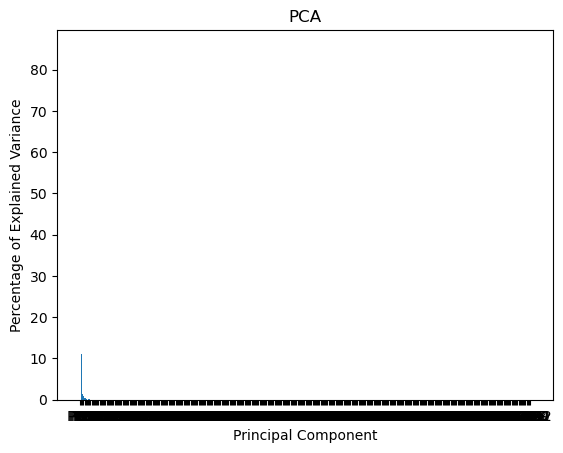

In [32]:
"""
Plots a bar chart showing the scree plot for principal components, indicating the percentage of explained variance.
"""

# Plots a bar chart with x-values, y-values, and tick labels
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)

# Sets the y-axis label
plt.ylabel('Percentage of Explained Variance')

# Sets the x-axis label
plt.xlabel('Principal Component')

# Sets the title of the plot
plt.title('PCA')

# Displays the plot
plt.show

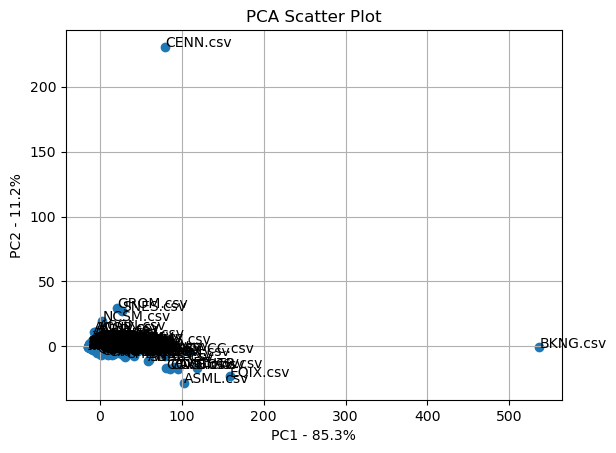

In [33]:
"""
Creates a PCA scatter plot using PC1 and PC2 values, with annotated data points showing filenames.
"""

# Creates a DataFrame 'pca_df' with PCA data, using filenames as the index and 'labels' as column names
pca_df = pd.DataFrame(pca_data, index=os.listdir(final_folder), columns=labels)

# Creates a scatter plot using PC1 and PC2 values from 'pca_df'
plt.scatter(pca_df.PC1, pca_df.PC2)

# Sets title, x-axis label, and y-axis label for the plot
plt.title('PCA Scatter Plot')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# Annotates each data point in the plot with its corresponding filename
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

# Enables grid lines on the plot
plt.grid(True)
plt.show()

In [34]:
"""
Performs PCA on 'scaled_df' after dropping specific columns, returning transformed data and explained variance ratios.
"""

# Removes 'CENN', 'BKNG', and 'BANR' columns from 'scaled_df'
scaled_drop = scaled_df.drop(['CENN', 'BKNG', 'BANR'], axis=1)

# Transposes 'scaled_drop' DataFrame
scaled_drop_transp = scaled_drop.T

# Performs Principal Component Analysis (PCA) on transposed DataFrame
pca = PCA()
pca.fit(scaled_drop_transp)
pca_data = pca.transform(scaled_drop_transp)

# Calculates explained variance ratios and creates labels for principal components
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]


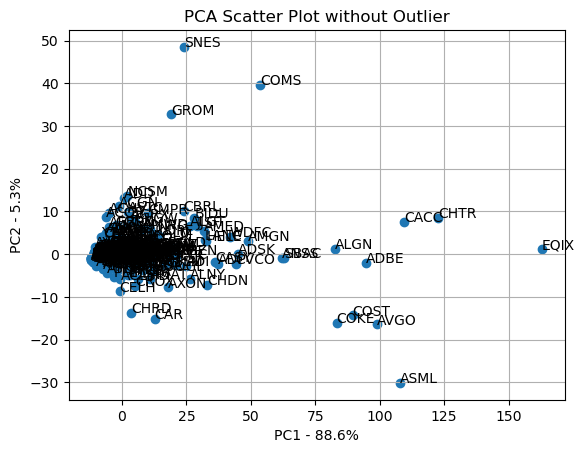

In [35]:
"""
Creates a scatter plot of PCA data with labeled points, using explained variance percentages for axes.
"""

# Creates a DataFrame 'pca_df' with PCA data, using column names from 'scaled_drop' and 'labels' as row and column indices
pca_df = pd.DataFrame(pca_data, index=scaled_drop.columns, columns=labels)

# Creates a scatter plot using 'PC1' and 'PC2' columns from 'pca_df'
plt.scatter(pca_df.PC1, pca_df.PC2)

# Sets plot title, x-label, and y-label with percentages of explained variance
plt.title('PCA Scatter Plot without Outlier')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# Annotates each data point in the plot with its corresponding sample name
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

# Enables grid lines in the plot
plt.grid(True)

# Displays the plot
plt.show()

C:\Users\aresm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


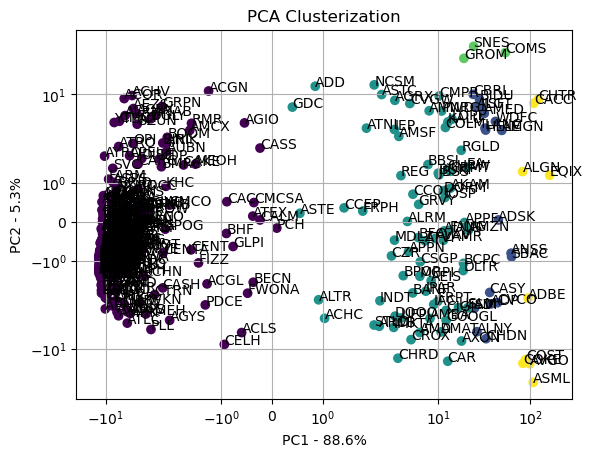

In [36]:
"""
Performs K-means clustering on PCA-transformed data, visualizes clusters in a scatter plot, and adds annotations.
"""

# Specifies the number of clusters to be used
n_clusters = 5

# Creates a KMeans object with the specified number of clusters and 10 iterations
kmeans = KMeans(n_clusters=n_clusters, n_init=10)

# Fits and predicts the data using the KMeans algorithm on the 'PC1' and 'PC2' columns of pca_df
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Creates a scatter plot of 'PC1' vs 'PC2' with color-coded clusters
plt.scatter(pca_df.PC1, pca_df.PC2, c=pca_df.Cluster, cmap='viridis')
plt.xscale('symlog')
plt.yscale('symlog')

# Sets the title and axis labels for the plot
plt.title('PCA Clusterization')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

# Adds annotations for each data point on the plot
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

# Displays grid lines on the plot
plt.grid(True)
plt.show()


# Task 2: Clustering analysis

## Task 2.1: Clustering Analysis by K-means

### Task 2.1.1: Identification of the best value of k


In [40]:
"""
Reshapes the transposed 'scaled_drop' into a 3D array, 'X', with dimensions (columns, rows, 1).
"""

# Reshapes the transpose of 'scaled_drop' into a 3D array with dimensions (columns, rows, 1)
X = scaled_drop.T.values.reshape((scaled_drop.shape[1], scaled_drop.shape[0], 1))

# Prints the shape of 'X'
X.shape

(389, 1369, 1)

In [38]:
"""
Defines cluster numbers. Fits TimeSeriesKMeans models with different cluster counts and calculates inertia values.
"""

# Defines a list of cluster numbers from 2 to 6
clusters = list(range(2, 7))

# Initializes an empty list to store inertia values
inertia = []

# Iterates over the cluster numbers
for i in clusters:
    # Creates a TimeSeriesKMeans model with the specified parameters
    model = TimeSeriesKMeans(n_clusters=i, init='k-means++', metric="dtw", max_iter=5, random_state=0)
    
    # Fits the model to the data
    model.fit(X)
    
    # Appends the inertia value of the model to the inertia list
    inertia.append(model.inertia_)


KeyboardInterrupt: 

In [ ]:
"""
Plots a graph showing the relationship between the number of clusters and inertia using the elbow method.
The optimal number of clusters is 5 and is indicated by the red dashed line
"""
# Creates a figure with size 10x6 inches
plt.figure(figsize=(10, 6))

# Plots the data points with clusters on the x-axis and inertia on the y-axis
plt.plot(clusters, inertia, marker='o')

# Adds a horizontal dashed red line at y=10
plt.axhline(y=9.3, color='r', linestyle='--')

# Adds the text "cluster = 5" at coordinates (10, 12) in red color
plt.text(5.6, 10, 'cluster = 4', color='r')

# Sets the label for the x-axis
plt.xlabel('Number of clusters')

# Sets the label for the y-axis
plt.ylabel('Inertia')

# Sets the title of the plot
plt.title('Elbow method for the optimal choice of number of clusters')

# Adds a grid to the plot
plt.grid()

# Displays the plot
plt.show()

In [ ]:
# Storing the optimal number of clusters in the variable k_elbow_km
k_elbow_KM = 4

### Task 2.1.2: Clusterization and Characterization of the obtained clusters

#### Clusterization

In [ ]:
"""
Uses TimeSeriesKMeans to cluster time series data based on Dynamic Time Warping distance.
"""

# Initializes a TimeSeriesKMeans model with specified parameters
model_KM = TimeSeriesKMeans(n_clusters=k_elbow_KM, init='k-means++', metric="dtw", max_iter=10, random_state=0)

# Fits the model to the input data and assigns cluster labels to each data point
y_pred_KM = model_KM.fit_predict(X)

# Prints the cluster label for each data point
for i in range(len(y_pred_KM)):
    print(f"cluster {y_pred_KM[i]}")


#### Visualisation

In [42]:
"""
Calculates distance matrix using DTW to visualize k-means and DBSCAN on scatter plot.
"""

# Initializes an empty distance matrix with zeros
dist_matrix_dtw = np.zeros((X.shape[0], X.shape[0]))

# Calculates the pairwise distance using the dynamic time warping (DTW) algorithm
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        dist_matrix_dtw[i, j] = dtw(X[i, :, :], X[j, :, :])

# Prints the distance matrix
print(dist_matrix_dtw)

[[ 0.          8.93285401 17.39070826 ... 53.14301709  0.85355935
   3.72885659]
 [ 8.93285401  0.         18.0058445  ... 36.8394265   9.4863698
   8.64320232]
 [17.39070826 18.0058445   0.         ... 33.26471977 18.39897947
  11.66313694]
 ...
 [53.14301709 36.8394265  33.26471977 ...  0.         54.15169528
  45.91969513]
 [ 0.85355935  9.4863698  18.39897947 ... 54.15169528  0.
   4.71976027]
 [ 3.72885659  8.64320232 11.66313694 ... 45.91969513  4.71976027
   0.        ]]


In [ ]:
"""
Performs t-SNE dimensionality reduction on the data and visualizes it using a scatter plot colored by K-Means clustering.
"""

# Perform t-SNE on the data
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(dist_matrix_dtw)

# Create the plot
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_pred_KM, cmap='Paired')
plt.title("K-Means")
plt.show()


### Task 2.1.3: Evaluation of the clustering results

In [ ]:
"""
Reshapes input data and calculates the Silhouette score.
"""

# Evaluating with Silhouette
X_reshape = X.reshape((X.shape[0], X.shape[1]))

# Calculating the silhouette score
silhouette_avg = silhouette_score(dist_matrix_dtw, y_pred_KM)

# Printing the silhouette score
print("Silhouette Score:", silhouette_avg)

## Task 2.2: Clustering Analysis by density-based clustering (DBSCAN)

### Task 2.2.1: Study of the clustering parameters


In [ ]:
"""
Calculates distances in k-nearest neighbors, sorts and visualizes the k-distance graph with epsilon threshold.
"""

# Computes distances in k-nearest neighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_reshape)
distances, indices = nbrs.kneighbors(X_reshape)

# Sorts the distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]

# Displays the graph
plt.plot(distances)
plt.axhline(y=11.55, color='r', linestyle='--')
plt.text(12, 12, 'eps=11.55', color='r', va='bottom')
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [ ]:
# Optimal value for EPS
eps_optimal = 11.55

In [ ]:
"""
Applies DBSCAN clustering with varying 'min_samples' on a precomputed distance matrix,
calculates and visualizes silhouette scores.
"""

# Assume 'dist_matrix_dtw' is the precomputed distance matrix and 'eps_optimal' is the optimal epsilon value
min_samples_range = range(1, 13)
silhouette_scores = []

# Iterate over different values of min_samples
for min_samples in min_samples_range:
    # Apply DBSCAN clustering using the precomputed distance matrix and specified parameters
    dbscan = DBSCAN(metric="precomputed", eps=eps_optimal, min_samples=min_samples)
    y_pred_DB = dbscan.fit_predict(dist_matrix_dtw)
    
    # Calculate silhouette score only if there are more than 1 cluster (silhouette cannot be computed with 1 cluster)
    if len(set(y_pred_DB)) > 1:
        silhouette = silhouette_score(dist_matrix_dtw, y_pred_DB, metric='precomputed')
        silhouette_scores.append(silhouette)
    else:
        silhouette_scores.append(None)

# Visualize the silhouette scores
plt.plot(min_samples_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different min_samples')
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Optimal value for min_samples
min_samples_opt = 3

### Task 2.2.2: Characterization and interpretation of the obtained clusters

In [ ]:
"""
Applies DBSCAN clustering and t-SNE dimensionality reduction to visualize the data in a scatter plot.
"""

# Initializes a DBSCAN object with the specified parameters
dbscan_dtw = DBSCAN(metric="precomputed", eps=eps_optimal, min_samples=min_samples_opt)

# Performs DBSCAN clustering on the given distance matrix using the specified parameters
y_pred_DB = dbscan_dtw.fit_predict(dist_matrix_dtw)

# Performs t-SNE dimensionality reduction on the distance matrix
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(dist_matrix_dtw)

# Creates a scatter plot of the t-SNE transformed data, colored by DBSCAN cluster labels
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_pred_DB, cmap='Paired')
plt.title("DBSCAN")
plt.show()


### Task 2.2.3: Evaluation of the clustering results


In [ ]:
# Compute Silhouette score
print("The Silhouette Score is:",silhouette_score(dist_matrix_dtw, y_pred_DB, metric='precomputed'))

## Task 2.3: Clustering Analysis by hierarchical clustering

### Task 2.3.1: Compare different clustering results got by using different version of the algorithm

The linkage ward has a silhouette score with 2 clusters of:  0.8600312442871159
The linkage ward has a silhouette score with 3 clusters of:  0.7209535140614569
The linkage ward has a silhouette score with 4 clusters of:  0.520591907836858
The linkage ward has a silhouette score with 5 clusters of:  0.5180091891263711
The linkage ward has a silhouette score with 6 clusters of:  0.5233507334980279
The linkage ward has a silhouette score with 7 clusters of:  0.5129346894561204
The linkage ward has a silhouette score with 8 clusters of:  0.5147077677617692
The linkage ward has a silhouette score with 9 clusters of:  0.45651806185355753
The linkage ward has a silhouette score with 10 clusters of:  0.45492766476217905
The linkage ward has a silhouette score with 11 clusters of:  0.4550251468137109
The linkage ward has a silhouette score with 12 clusters of:  0.4548557478420965


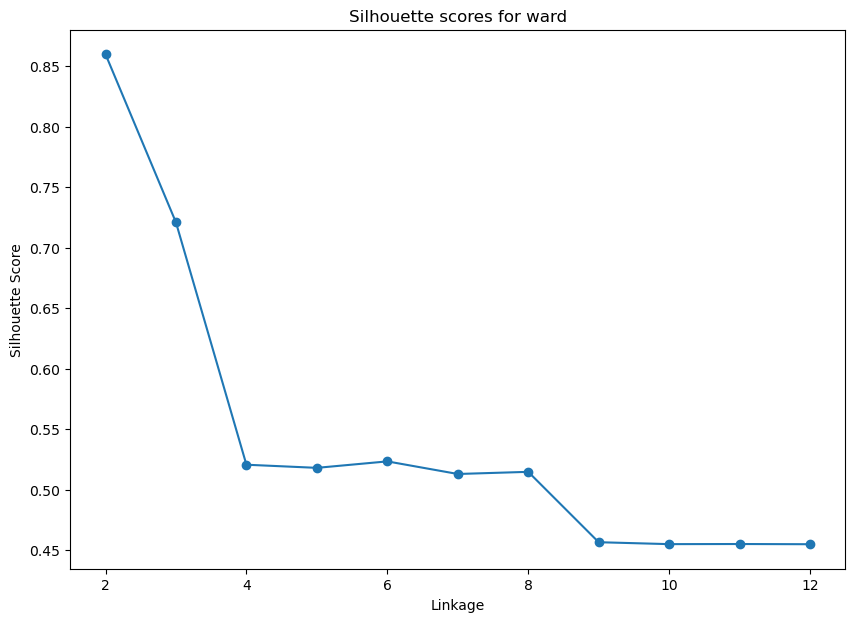

The linkage complete has a silhouette score with 2 clusters of:  0.8600312442871159
The linkage complete has a silhouette score with 3 clusters of:  0.8406894438988208
The linkage complete has a silhouette score with 4 clusters of:  0.7447168150547084
The linkage complete has a silhouette score with 5 clusters of:  0.7486654723986554
The linkage complete has a silhouette score with 6 clusters of:  0.7344958298586535
The linkage complete has a silhouette score with 7 clusters of:  0.7320512850437629
The linkage complete has a silhouette score with 8 clusters of:  0.720955710244852
The linkage complete has a silhouette score with 9 clusters of:  0.7198513156126817
The linkage complete has a silhouette score with 10 clusters of:  0.6345195321102912
The linkage complete has a silhouette score with 11 clusters of:  0.634729036552562
The linkage complete has a silhouette score with 12 clusters of:  0.6356532587049385


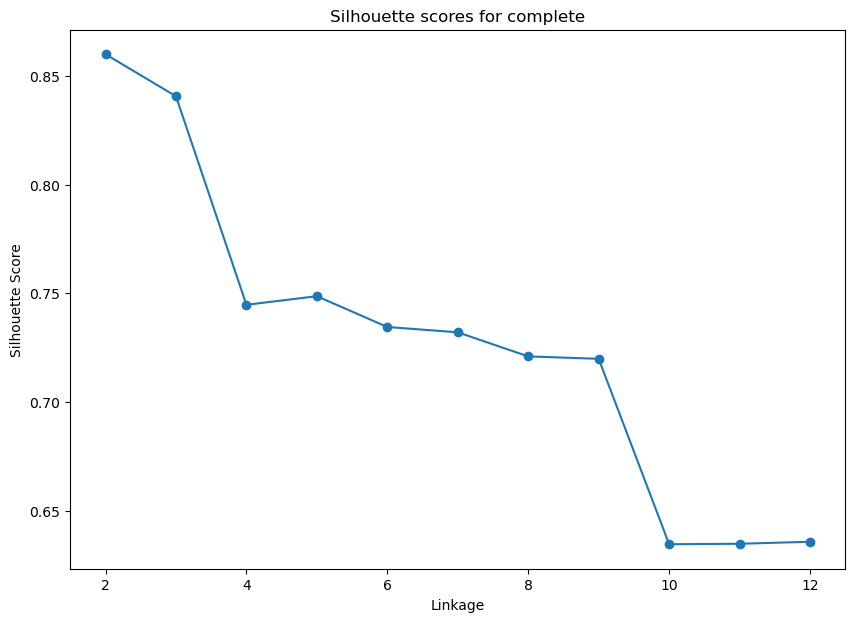

The linkage average has a silhouette score with 2 clusters of:  0.8526659540225997
The linkage average has a silhouette score with 3 clusters of:  0.818280488375122
The linkage average has a silhouette score with 4 clusters of:  0.8150558602089012
The linkage average has a silhouette score with 5 clusters of:  0.7663029233942005
The linkage average has a silhouette score with 6 clusters of:  0.7274301795837914
The linkage average has a silhouette score with 7 clusters of:  0.7225926498862301
The linkage average has a silhouette score with 8 clusters of:  0.7200878880738956
The linkage average has a silhouette score with 9 clusters of:  0.7203185100184636
The linkage average has a silhouette score with 10 clusters of:  0.7126693797416386
The linkage average has a silhouette score with 11 clusters of:  0.6789201778171308
The linkage average has a silhouette score with 12 clusters of:  0.6793179846865561


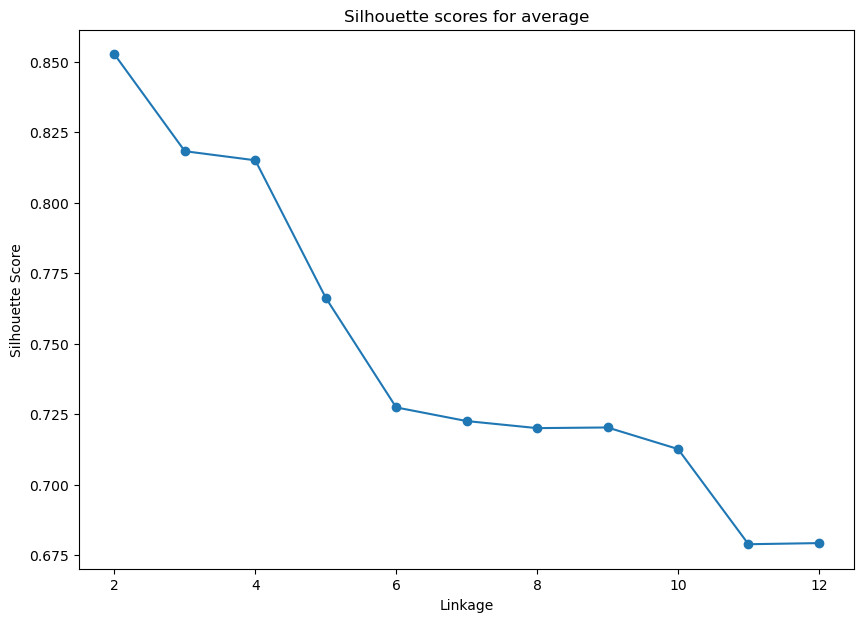

The linkage single has a silhouette score with 2 clusters of:  0.7705412242518895
The linkage single has a silhouette score with 3 clusters of:  0.7395244853803784
The linkage single has a silhouette score with 4 clusters of:  0.7435502892616749
The linkage single has a silhouette score with 5 clusters of:  0.7430818891082969
The linkage single has a silhouette score with 6 clusters of:  0.778154930490166
The linkage single has a silhouette score with 7 clusters of:  0.7785965883000653
The linkage single has a silhouette score with 8 clusters of:  0.7131417378175784
The linkage single has a silhouette score with 9 clusters of:  0.7144257993131214
The linkage single has a silhouette score with 10 clusters of:  0.7147323564653179
The linkage single has a silhouette score with 11 clusters of:  0.712625775164731
The linkage single has a silhouette score with 12 clusters of:  0.7100821116731308


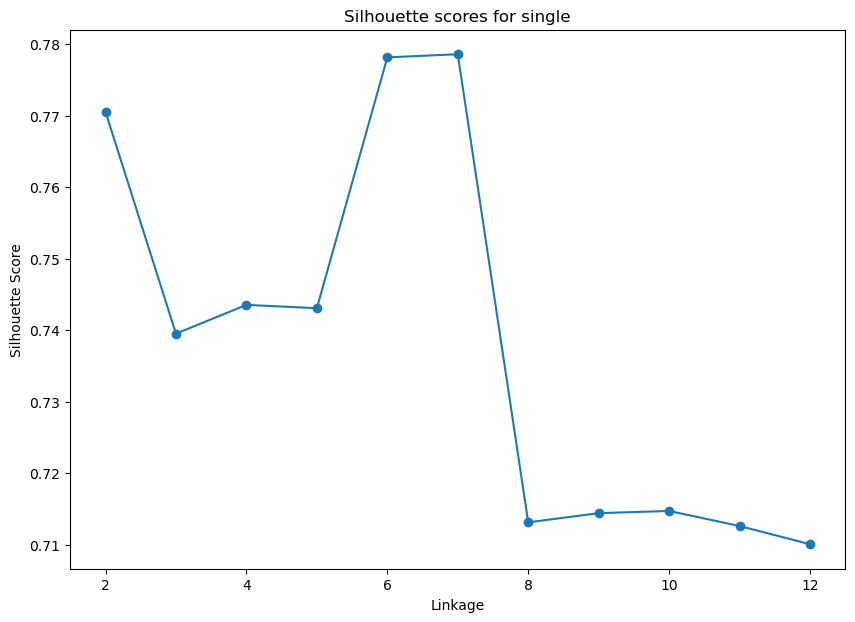

In [45]:
"""
Evaluates different linkage methods and cluster numbers using AgglomerativeClustering,
calculating and plotting silhouette scores for each combination.
"""

# List of linkage methods to evaluate
linkages = ['ward', 'complete', 'average', 'single']

# Range of cluster numbers to consider
n_clusters = range(1, 13)

# Loop over each linkage method
for linkage in linkages:
    silhouette_scores = []
    
    # Loop over each cluster number
    for cluster in n_clusters:
        # Create AgglomerativeClustering model with specified linkage and cluster number
        model = AgglomerativeClustering(linkage=linkage, n_clusters=cluster)
        
        # Fit the model and obtain predicted labels
        labels = model.fit_predict(X_reshape)
        
        # Calculate silhouette score only if there are more than 1 cluster
        if len(set(labels)) > 1:
            silhouette = silhouette_score(X_reshape, labels)
            silhouette_scores.append(silhouette)
            print(f"The linkage {linkage} has a silhouette score with {cluster} clusters of: ", silhouette)
        else:
            silhouette_scores.append(None)
    
    # Visualize the silhouette scores
    plt.figure(figsize=(10, 7))
    plt.plot(n_clusters, silhouette_scores, marker='o')
    plt.xlabel('Linkage')
    plt.ylabel('Silhouette Score')
    plt.title(f'Silhouette scores for {linkage}')
    plt.show()

### Task 2.3.2: Show and discuss different dendrograms using different algorithms

The silhouette score for linkage ward is: 0.7587352721929276


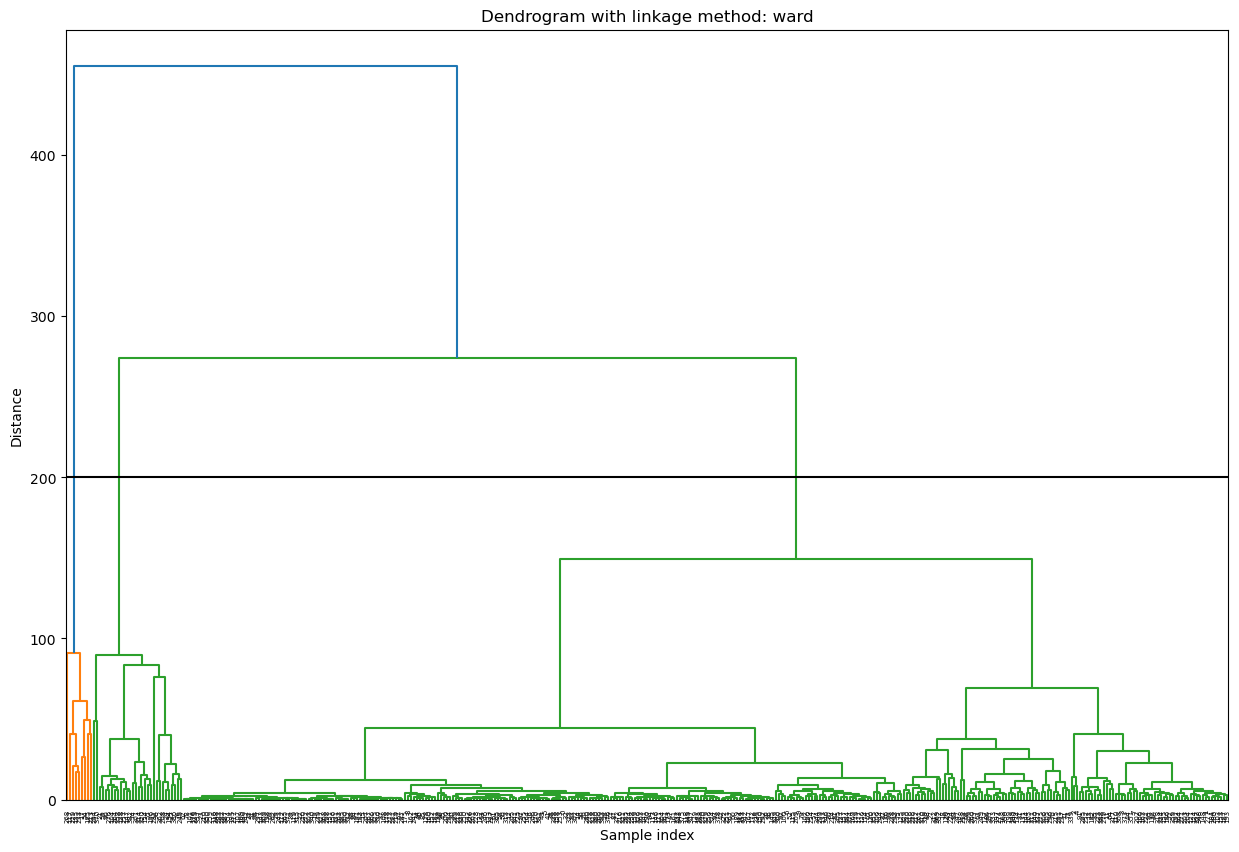

The silhouette score for linkage complete is: 0.7707167804313383


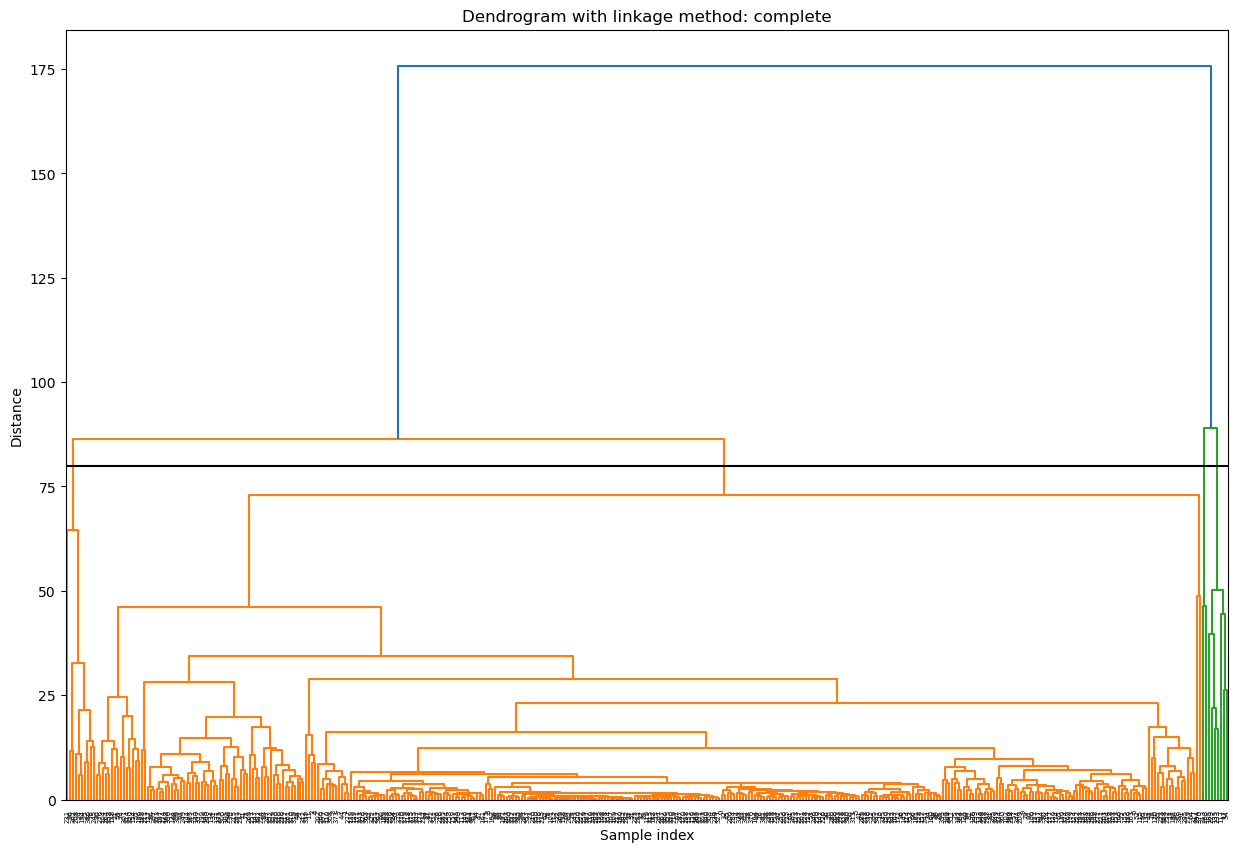

The silhouette score for linkage average is: 0.806566132796459


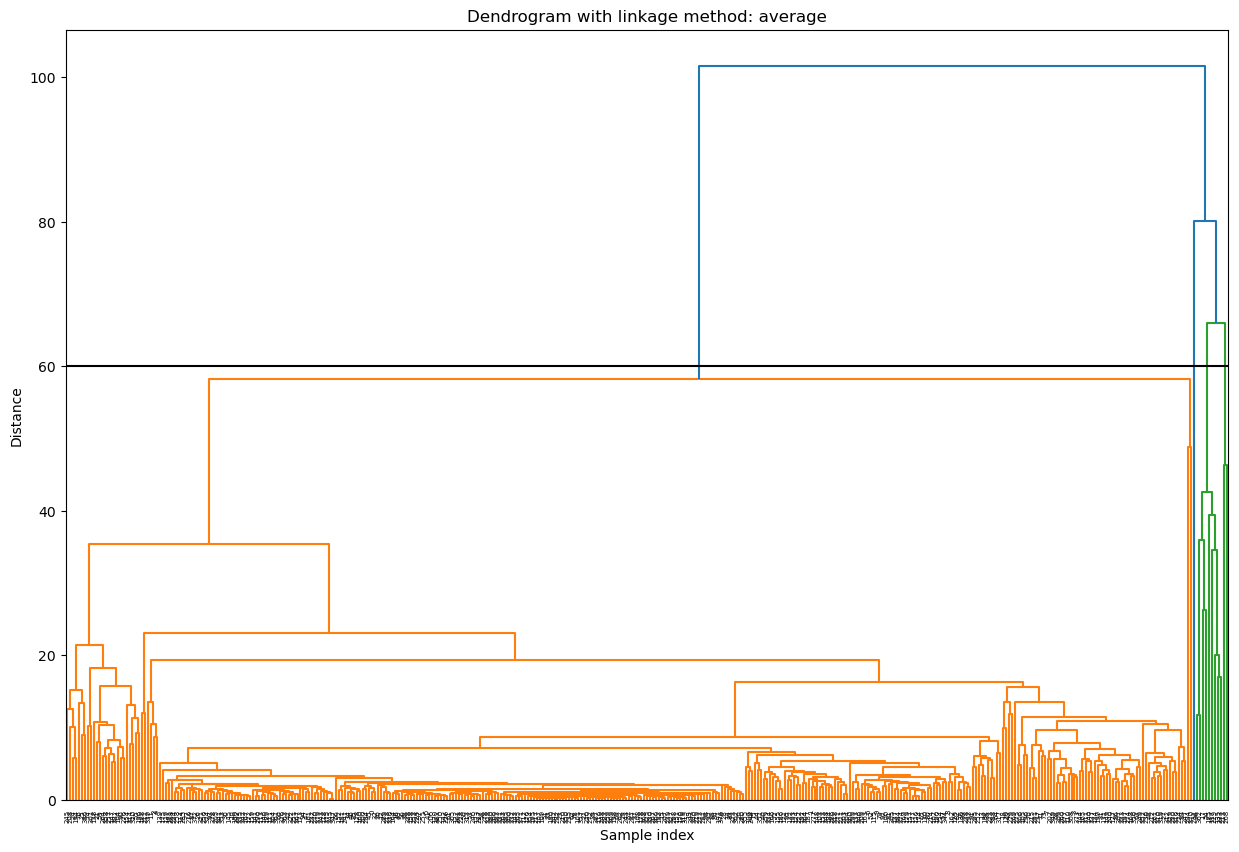

The silhouette score for linkage single is: 0.7663733398955381


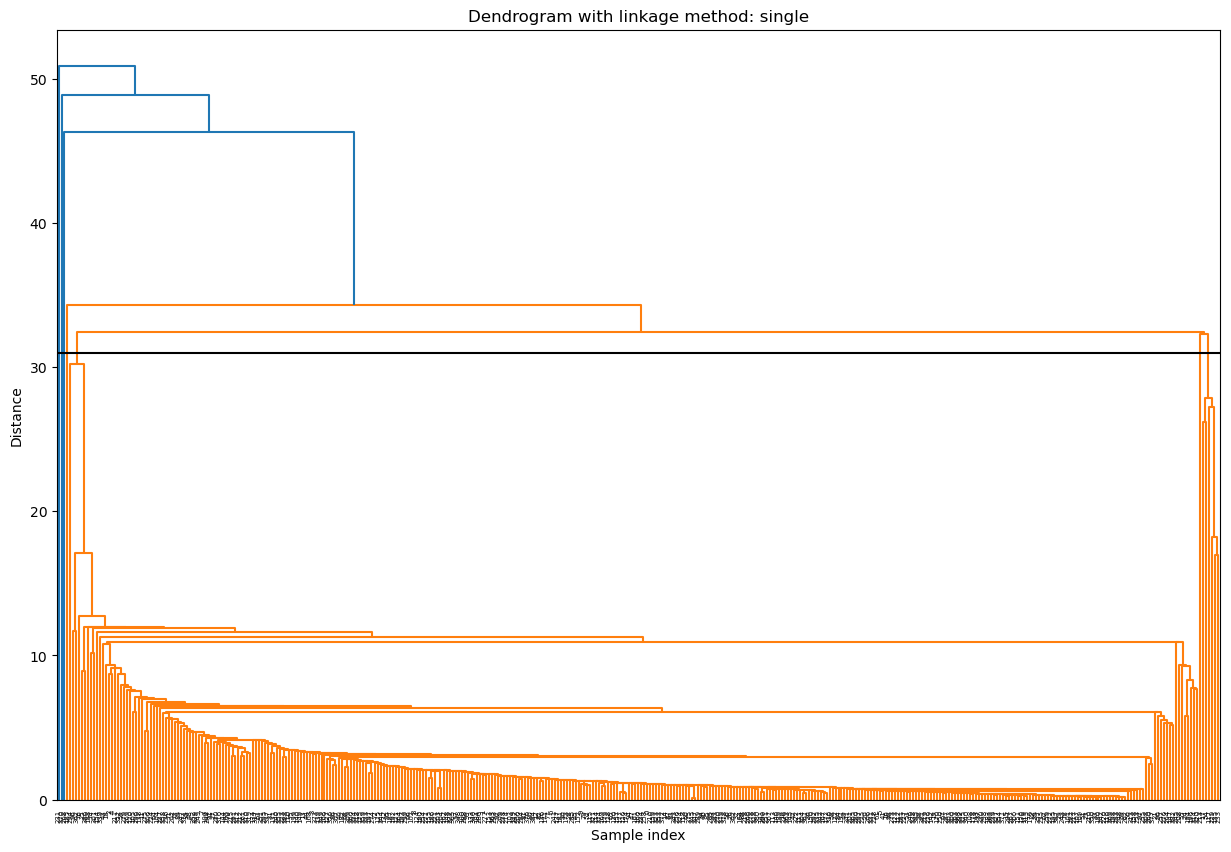

In [49]:
from scipy.cluster.hierarchy import linkage
"""
Performs hierarchical clustering using different linkage methods and computes the silhouette score for each method.
Plots dendrograms with specified line positions.
"""

# List of linkage methods and line positions for drawing horizontal lines on dendrograms
linkages = ['ward', 'complete', 'average', 'single']
line_graphic = [200, 80, 60, 31]

# Iterate over each linkage method and its corresponding line position
for i, linkage_method in enumerate(linkages):
    # Perform hierarchical clustering using the current linkage method
    Z = linkage(X_reshape, method=linkage_method)
    
    # Create a new figure and plot the dendrogram
    plt.figure(figsize=(15, 10))
    dendrogram(Z)
    
    # Draw a horizontal line at the specified line position
    plt.axhline(y=line_graphic[i], c='k')
    
    # Find the fusion level that maximizes the difference
    max_diff_level = line_graphic[i]
    
    # Assign each point to a cluster based on the fusion level
    clusters = fcluster(Z, max_diff_level, criterion='distance')
    
    # Compute and print the silhouette score for the current linkage method
    print(f'The silhouette score for linkage {linkage_method} is:', silhouette_score(dist_matrix_dtw, clusters))
    
    # Set the title, x-axis label, and y-axis label for the plot
    plt.title('Dendrogram with linkage method: {}'.format(linkage_method))
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    
    # Show the plot
    plt.show()


## Task 2.4: Final evaluation of the best clustering approach and comparison of the clustering: 

# Task 3: Predictive Analysis

## Task 3.1: Use extracted stats; adapt, integrate for predictions.


In [50]:
# Calculates the mean of the DataFrame 'scaled_drop'
df_mean = scaled_drop.mean()

# Calculates the standard deviation of the DataFrame 'scaled_drop'
df_std = scaled_drop.std()

# Calculates the volatility (standard deviation of percent changes) of 'scaled_drop'
volatility = scaled_drop.pct_change().std()

# Calculates the average return (mean of percent changes) of 'scaled_drop'
average_return = scaled_drop.pct_change().mean()

# Finds the maximum percent change in 'scaled_drop'
max_pct_change = scaled_drop.pct_change().max()

# Calculates the skewness of prices in 'scaled_drop'
price_skewness = scaled_drop.apply(skew)

# Calculates the kurtosis of prices in 'scaled_drop'
price_kurtosis = scaled_drop.apply(kurtosis)

# Prints the mean of 'scaled_drop'
print(df_mean.head())
print("===========================")

# Prints the shape (dimension) of 'df_std'
print(df_std.head())
print("===========================")

# Prints the shape of 'volatility'
print(volatility.head())
print("===========================")

# Prints the shape of 'average_return'
print(average_return.head())
print("===========================")

# Prints the shape of 'max_pct_change'
print(max_pct_change.head())
print("===========================")

# Prints the shape of 'price_skewness'
print(price_skewness.head())
print("===========================")

# Prints the shape of 'price_kurtosis'
print(price_kurtosis.head())

ACER   -0.319643
ACGL   -0.081345
ACGN    0.005590
ACHC   -0.022390
ACHV   -0.109656
dtype: float64
ACER    0.082463
ACGL    0.079631
ACGN    0.445960
ACHC    0.131393
ACHV    0.456424
dtype: float64
ACER    0.029163
ACGL    0.794634
ACGN    4.204690
ACHC    8.277885
ACHV    1.157404
dtype: float64
ACER    0.000666
ACGL   -0.033719
ACGN   -0.138590
ACHC    0.248246
ACHV    0.032625
dtype: float64
ACER      0.552717
ACGL      2.721415
ACGN     59.475664
ACHC    249.862474
ACHV     34.804998
dtype: float64
ACER    1.209650
ACGL    1.170366
ACGN    1.984655
ACHC    1.033020
ACHV    2.629237
dtype: float64
ACER    0.097929
ACGL    0.521442
ACGN    3.383779
ACHC    0.038309
ACHV    6.099658
dtype: float64


In [51]:
"""
Selects 'company' and 'sector' columns, concatenates multiple DataFrames, resets index, renames columns, and merges DataFrames.
"""

# Selects 'company' and 'sector' columns from 'df_sector_capit' DataFrame
df_sector_capit = df_sector_capit[['company','sector']]

# Concatenates multiple DataFrames horizontally using specified column names
features = pd.concat([df_mean, df_std, volatility, average_return, max_pct_change, price_skewness, price_kurtosis], axis=1)

# Renames the columns of 'features' DataFrame
features.columns = ['mean','std_dev','volatility', 'avg_return', 'max_pct_change', 'price_skewness', 'price_kurtosis']


# Resets the index of 'features' DataFrame
df_features = features.reset_index()


# Renames the column 'index' to 'company' in 'df_features' DataFrame
df_features = df_features.rename(columns={'index': 'company'})
print(df_features)
print('=========================================')


# Merges 'df_reset' and 'df_sector_capit' DataFrames based on the 'company' column
features_merged_df = df_features.merge(df_sector_capit, on='company')

print(features_merged_df)

    company      mean   std_dev  volatility  avg_return  max_pct_change  \
0      ACER -0.319643  0.082463    0.029163    0.000666        0.552717   
1      ACGL -0.081345  0.079631    0.794634   -0.033719        2.721415   
2      ACGN  0.005590  0.445960    4.204690   -0.138590       59.475664   
3      ACHC -0.022390  0.131393    8.277885    0.248246      249.862474   
4      ACHV -0.109656  0.456424    1.157404    0.032625       34.804998   
..      ...       ...       ...         ...         ...             ...   
384    VNOM -0.196978  0.073118    0.035830    0.000611        0.207948   
385    VTNR -0.345762  0.051118    0.025091    0.000323        0.226332   
386    WDFC  1.056411  0.350552    0.046269    0.001968        0.596639   
387    WHLR -0.354564  0.049464    0.023821    0.000491        0.220087   
388    YTEN -0.231839  0.165026   15.473101    0.083524      305.022081   

     price_skewness  price_kurtosis  
0          1.209650        0.097929  
1          1.170366    

In [52]:
# Chiamare tutte le variabili con un nome inteliggente, mettere i commenti giusti migliorare il codice dove possibile, 
# fallo in modo intelligente, tipo crea una def dove c'e` ripetizione

Devo discrettizare i dati per poter fare la classification: e quindi sotto faccio la discretizzazione insieme ad altro capire bene in modo da poter spiegare

In [53]:
"""
Encodes categorical columns using LabelEncoder and separates 'sector' column as 'y'.
"""

# Initializes a LabelEncoder object
le = LabelEncoder()

# Encodes the 'sector' column of 'features_merged_df' using the LabelEncoder
features_merged_df['sector'] = le.fit_transform(features_merged_df['sector'])


# Prints the original labels stored in the 'classes_' attribute of 'le'
print(le.classes_)

# Maps a encoded label back to its original label using the inverse_transform method
original_label_sector = le.inverse_transform([0])

# Maps another encoded label back to its original label
original_label = le.inverse_transform([2])

# Encodes the 'company' column of 'features_merged_df' using the LabelEncoder
features_merged_df['company'] = le.fit_transform(features_merged_df['company'])

# Sets the 'company' column as the index of 'features_merged_df'
features_merged_df = features_merged_df.set_index('company')

# Stores the 'sector' column in 'y' and removes it from 'features_merged_df'
y = features_merged_df.pop('sector')
print(y)
print(features_merged_df)

['Basic Materials' 'Communication Services' 'Consumer Cyclical'
 'Consumer Defensive' 'Energy' 'Financial Services' 'Healthcare'
 'Industrials' 'Real Estate' 'Technology']
company
0      6
1      5
2      6
3      6
4      6
      ..
384    4
385    4
386    0
387    8
388    0
Name: sector, Length: 389, dtype: int32
             mean   std_dev  volatility  avg_return  max_pct_change  \
company                                                               
0       -0.319643  0.082463    0.029163    0.000666        0.552717   
1       -0.081345  0.079631    0.794634   -0.033719        2.721415   
2        0.005590  0.445960    4.204690   -0.138590       59.475664   
3       -0.022390  0.131393    8.277885    0.248246      249.862474   
4       -0.109656  0.456424    1.157404    0.032625       34.804998   
...           ...       ...         ...         ...             ...   
384     -0.196978  0.073118    0.035830    0.000611        0.207948   
385     -0.345762  0.051118    0.025091   

## Task 3.2: Analyze, compare different models, evaluate performance.

In [54]:
"""
Splits the dataset into training and testing sets with a 20% test size using a random seed for reproducibility.
"""

# The code splits the data into training and testing sets, with 'features_merged_df' as input and 'y' as target.
# 20% of the data is used for testing, ensuring reproducibility.
X_train, X_test, y_train, y_test = train_test_split(features_merged_df, y, test_size=0.2, random_state=42)

### SVM

In [55]:
from sklearn import svm

"""
Trains and evaluates SVM models with different kernel functions, selects the best model based on accuracy, 
and prints the prediction of the best model.
"""

# Define the models with different kernel functions
linear_svm = svm.SVC(kernel='linear')
poly_svm = svm.SVC(kernel='poly', degree=3)
rbf_svm = svm.SVC(kernel='rbf', gamma='scale')
sigmoid_svm = svm.SVC(kernel='sigmoid')

# Train the models using the training data
linear_svm.fit(X_train, y_train)
poly_svm.fit(X_train, y_train)
rbf_svm.fit(X_train, y_train)
sigmoid_svm.fit(X_train, y_train)

# Make predictions on the test data
linear_predictions = linear_svm.predict(X_test)
poly_predictions = poly_svm.predict(X_test)
rbf_predictions = rbf_svm.predict(X_test)
sigmoid_predictions = sigmoid_svm.predict(X_test)

# Calculate accuracies of the predictions
linear_accuracy = accuracy_score(y_test, linear_predictions)
poly_accuracy = accuracy_score(y_test, poly_predictions)
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
sigmoid_accuracy = accuracy_score(y_test, sigmoid_predictions)

# Create a dictionary of model names and their accuracy scores
scores = {'linear': linear_accuracy, 'poly': poly_accuracy, 'rbf': rbf_accuracy, 'sigmoid': sigmoid_accuracy}

# Print the accuracy scores for each model
print(scores)

# Find the model with the highest accuracy score
best_model = max(scores, key=scores.get)

# Print the name of the best model with its corresponding prediction
print(f"The best prediction is: {best_model}_predictions")

{'linear': 0.07692307692307693, 'poly': 0.08974358974358974, 'rbf': 0.08974358974358974, 'sigmoid': 0.08974358974358974}
The best prediction is: poly_predictions


In [56]:
"""
Prints the classification report, and calculates/print the root mean squared error (RMSE).
"""

# Print the classification report based on the true labels (y_test) and the best model's predictions
print('Classification report: \n', classification_report(y_test, linear_predictions, zero_division=1))

# Calculate and print the root mean squared error (RMSE) between the true labels (y_test) and the best model's predictions
print("RMSE: ", np.sqrt(mean_squared_error(y_test, linear_predictions)))

Classification report: 
               precision    recall  f1-score   support

           0       0.09      0.33      0.14         6
           1       1.00      0.00      0.00         6
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        11
           4       1.00      0.00      0.00        10
           5       0.22      0.20      0.21        10
           6       0.00      0.00      0.00        10
           7       0.11      0.29      0.16         7
           8       0.00      0.00      0.00         3
           9       1.00      0.00      0.00         7

    accuracy                           0.08        78
   macro avg       0.34      0.08      0.05        78
weighted avg       0.34      0.08      0.05        78

RMSE:  4.238105527418879


### AdaBoost


In [57]:
"""
Performs hyperparameter optimization for a decision tree classifier and
uses it to train an AdaBoost classifier for classification. Prints the classification report.
"""

# Defines a dictionary of hyperparameter distributions for a decision tree classifier
param_dist_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best','random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': list(range(2,30)),
    'min_samples_leaf': list(range(2,30)),
}

# Initializes a decision tree classifier
tree = DecisionTreeClassifier()

# Performs randomized search for optimal hyperparameters of the decision tree classifier
random_search_tree = RandomizedSearchCV(tree, param_distributions=param_dist_tree, n_iter=10, cv=5)

# Fits the randomized search model to the training data
random_search_tree.fit(X_train, y_train)

# Retrieves the best estimator from the randomized search
tree_best = random_search_tree.best_estimator_

# Defines a dictionary of hyperparameter distributions for AdaBoost classifier
param_dist_ada = {
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Initializes an AdaBoost classifier using the best estimator from the decision tree search
ada = AdaBoostClassifier(estimator=tree_best)

# Performs randomized search for optimal hyperparameters of the AdaBoost classifier
random_search_ada = RandomizedSearchCV(ada, param_distributions=param_dist_ada, n_iter=10, cv=5)

# Fits the randomized search model to the training data
random_search_ada.fit(X_train, y_train)

# Retrieves the best parameters from the randomized search
best_par_ada = random_search_ada.best_params_

# Initializes an AdaBoost classifier with the best parameters
ada = AdaBoostClassifier(estimator=tree_best, n_estimators=best_par_ada['n_estimators'], learning_rate=best_par_ada['learning_rate'], algorithm=best_par_ada['algorithm'])

# Fits the AdaBoost classifier to the training data
ada.fit(X_train, y_train)

# Makes predictions using the trained AdaBoost classifier
y_pred_ada = ada.predict(X_test)

# Prints the classification report comparing the predicted and actual labels
print("Report: \n", classification_report(y_test, y_pred_ada))


Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.19      0.50      0.27         6
           2       0.00      0.00      0.00         8
           3       0.22      0.18      0.20        11
           4       0.75      0.30      0.43        10
           5       0.67      0.20      0.31        10
           6       0.43      0.30      0.35        10
           7       0.25      0.29      0.27         7
           8       0.14      0.33      0.20         3
           9       0.15      0.29      0.20         7

    accuracy                           0.23        78
   macro avg       0.28      0.24      0.22        78
weighted avg       0.32      0.23      0.24        78



### Random Forest

In [64]:
"""
Defines a random grid for hyperparameter tuning in a random forest model, with various settings for each hyperparameter.
"""

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=150, num=15)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num=15)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [65]:
"""
Optimizes Random Forest hyperparameters using random search, trains the model, predicts target values, and prints classification report.
"""

# Initializes a Random Forest classifier
rf = RandomForestClassifier()

# Performs randomized search for optimal hyperparameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=4)

# Fits the random search model on the training data
rf_random.fit(X_train, y_train)

# Retrieves the best hyperparameters found during random search
best_par_rf = rf_random.best_params_

# Configures the Random Forest classifier with the best hyperparameters
rf = RandomForestClassifier(
    n_estimators=best_par_rf['n_estimators'],
    min_samples_split=best_par_rf['min_samples_split'],
    min_samples_leaf=best_par_rf['min_samples_leaf'],
    max_features=best_par_rf['max_features'],
    max_depth=best_par_rf['max_depth'],
    bootstrap=best_par_rf['bootstrap']
)

# Fits the Random Forest model on the training data with optimized hyperparameters
rf.fit(X_train, y_train)

# Predicts the target variable using the trained Random Forest model
y_pred_rf = rf.predict(X_test)

# Prints the classification report comparing predicted and actual target values
print('Report: \n',classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.12      0.17      0.14         6
           2       0.00      0.00      0.00         8
           3       0.27      0.36      0.31        11
           4       0.50      0.20      0.29        10
           5       0.29      0.20      0.24        10
           6       0.20      0.30      0.24        10
           7       0.20      0.29      0.24         7
           8       0.20      0.33      0.25         3
           9       0.17      0.14      0.15         7

    accuracy                           0.21        78
   macro avg       0.19      0.20      0.19        78
weighted avg       0.21      0.21      0.20        78



### Naives Bayes 

In [60]:
"""
Creates a Gaussian Naive Bayes classifier and trains it on the training data.
Predicts the target variable for the test data and prints a classification report.
"""

# Creates a Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# Trains the classifier using the training data
gnb.fit(X_train, y_train)

# Predicts the target variable for the test data using the trained classifier
y_pred_gnb = gnb.predict(X_test)

# Prints the classification report comparing the true and predicted target values
print("Report: \n",classification_report(y_test, y_pred_gnb,zero_division=1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.00      0.00         6
           2       0.00      0.00      0.00         8
           3       1.00      0.00      0.00        11
           4       0.07      0.10      0.08        10
           5       0.13      0.70      0.23        10
           6       0.00      0.00      0.00        10
           7       0.33      0.14      0.20         7
           8       0.00      0.00      0.00         3
           9       1.00      0.00      0.00         7

    accuracy                           0.12        78
   macro avg       0.35      0.09      0.05        78
weighted avg       0.36      0.12      0.06        78



### KNN


In [61]:
"""
Performs hyperparameter tuning for KNN using randomized search, trains the model,
makes predictions, and prints the classification report.
"""

# Defines a dictionary 'param_dist' with hyperparameter options for K-nearest neighbors (KNN) classifier
param_dist = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initializes a KNN classifier object
knn = KNeighborsClassifier()

# Performs randomized search with cross-validation to find the best hyperparameters for KNN
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Retrieves the best hyperparameters from the randomized search
best_par_knn = random_search.best_params_

# Trains a KNN classifier with the best hyperparameters on the training data
knn = KNeighborsClassifier(n_neighbors=best_par_knn['n_neighbors'], algorithm=best_par_knn['algorithm'],
                           metric=best_par_knn['metric'], weights=best_par_knn['weights']).fit(X_train, y_train)

# Makes predictions on the test data using the trained KNN classifier
y_pred_knn = knn.predict(X_test)

# Prints the classification report comparing the true labels (y_test) with the predicted labels (y_pred_knn)
print("Report: \n",classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       0.10      0.17      0.12         6
           1       0.20      0.17      0.18         6
           2       0.12      0.12      0.12         8
           3       0.00      0.00      0.00        11
           4       0.33      0.40      0.36        10
           5       0.10      0.10      0.10        10
           6       0.11      0.10      0.11        10
           7       0.14      0.14      0.14         7
           8       0.17      0.33      0.22         3
           9       0.00      0.00      0.00         7

    accuracy                           0.14        78
   macro avg       0.13      0.15      0.14        78
weighted avg       0.12      0.14      0.13        78



In [66]:
X_train.shape

(311, 7)

### Neural Network


In [62]:
"""
Defines a neural network model, trains it, performs predictions, and evaluates classification scores using a test dataset.
"""

# Defines a sequential model with three dense layers and dropout regularization
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')  # Assuming there are 10 unique sectors
])

# Compiles the model with appropriate loss function, optimizer, and evaluation metric
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Trains the model on the training data with specified number of epochs and batch size
model.fit(X_train, y_train, epochs=80, batch_size=256, validation_split=0.2)

# Performs predictions on the test data
y_pred = model.predict(X_test)
y_pred_nn = np.argmax(y_pred, axis=1)  

# Defines a function to report classification scores
def report_scores(test_label, test_pred):
    print(classification_report(test_label, test_pred, zero_division=1))

# Evaluates the model's performance using the defined function
report_scores(y_test, y_pred_nn)


Epoch 1/80
1/1 [==============================] - 2s 2s/step - loss: 7.4702 - accuracy: 0.1290 - val_loss: 4.2074 - val_accuracy: 0.1746
Epoch 2/80
1/1 [==============================] - 0s 58ms/step - loss: 9.7339 - accuracy: 0.0927 - val_loss: 3.4951 - val_accuracy: 0.1587
Epoch 3/80
1/1 [==============================] - 0s 63ms/step - loss: 7.8558 - accuracy: 0.1169 - val_loss: 3.3677 - val_accuracy: 0.0952
Epoch 4/80
1/1 [==============================] - 0s 83ms/step - loss: 11.3184 - accuracy: 0.1452 - val_loss: 3.1746 - val_accuracy: 0.0794
Epoch 5/80
1/1 [==============================] - 0s 57ms/step - loss: 8.9474 - accuracy: 0.1008 - val_loss: 3.0313 - val_accuracy: 0.0635
Epoch 6/80
1/1 [==============================] - 0s 57ms/step - loss: 7.2769 - accuracy: 0.1331 - val_loss: 2.9496 - val_accuracy: 0.0794
Epoch 7/80
1/1 [==============================] - 0s 53ms/step - loss: 6.7823 - accuracy: 0.1250 - val_loss: 3.2855 - val_accuracy: 0.0952
Epoch 8/80
1/1 [============

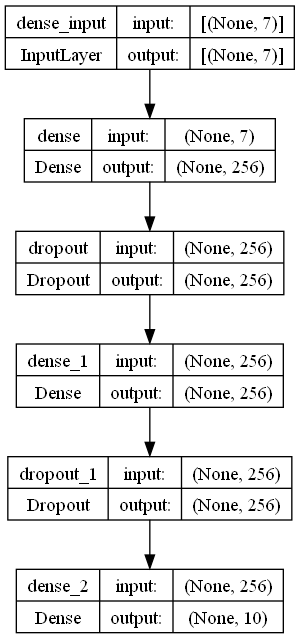

In [63]:
"""
Adds Graphviz binary path to PATH environment variable and generates a model visualization saved as a PNG file.
"""

# Adds the path to the Graphviz binary to the system's PATH environment variable
os.environ["PATH"] += os.pathsep + 'C:/Users/aresm/anaconda3/Lib/site-packages/graphviz/bin'

# Generates a visualization of the model and saves it as a PNG file
plot_model(model, to_file=r'C:\Users\aresm\OneDrive\Desktop\UNIPI\DATA_MINING\PROJECT\model.png', show_shapes=True, show_layer_names=True)